'''An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is 
a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is
pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the 
supply quantity in every warehouse in the entire country.

Goal & Objective: This exercise aims to build a model, using historical data that will determine the optimum weight of the 
product to be shipped each time to the warehouse.
Also, try to analyze the demand pattern in different pockets of the country so management can drive the advertisement 
campaign, particularly in those pockets.


In [1]:
#importing basic libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os                      #this command tells us where this jupyter notebook file is saved on our computer
os.getcwd()

'C:\\Users\\C340\\Downloads'

In [3]:
#reading the file
df=pd.read_csv("Dataset.csv")

In [4]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",25)
df.head(pd.options.display.max_rows)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,0,0,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,0,0,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,Rented,45,0,0,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,0,0,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,0,0,0,78,43.0,NaN,6,0,C,6,2,7130


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [6]:
df.isnull().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
                               ... 
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
Length: 24, dtype: int64

# Handling missing values

Some columns of the dataset has missisng values so we handle that by replacing missing values with the mean, median, or mode
(most frequent value) of the respective column. Mean and median is used mostly in case of numeric data column and mode is used 
for categorical type of data.

In [7]:
#df['wh_est_year'].mode()[0])
df['wh_est_year'].value_counts()

2000.0    551
2006.0    541
2002.0    533
2014.0    531
2007.0    528
         ... 
2003.0    469
2022.0    332
1997.0    329
1996.0    191
2023.0    142
Name: wh_est_year, Length: 28, dtype: int64

In [8]:
df['workers_num']=df['workers_num'].fillna(df['workers_num'].mean())

In [9]:
df['wh_est_year']=df['wh_est_year'].fillna(df['wh_est_year'].mode()[0])

In [10]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0])

In [11]:
df['approved_wh_govt_certificate'].value_counts()

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [13]:
df.isnull().sum().sum()

0

So 0 here means all the null values have been handled, now we move onto outlier treatment

# Outlier Treatment

An outlier is a data point that significantly deviates from the rest of the data.Handling outliers is an important step in 
data preprocessing because they can significantly impact the performance and accuracy of machine learning models. 
Identifying Outliers:
*Visual Inspection:
Plot your data using box plots or histograms to visually identify data points that are far from the main cluster.

*Descriptive Statistics:
Use statistical methods like IQR (Interquartile Range) to identify observations that fall significantly outside the mean 
or median.

We can handle these outliers using various techniques: *Trimming approach, *Capping or Flooring Values, *z_scores

In [14]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2004.923920,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.715077,7.190079,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2000.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2000.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [15]:
# # Assuming 'column_name' is the column with potential outliers
# column_name=['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt']
# for x in column_name:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[x], bins=30, kde=False)
#     plt.title('Histogram of')
#     plt.xlabel('Values')
#     plt.ylabel('Frequency')
#     plt.show()
    


Text(0.5, 1.0, 'Boxplot for All Columns')

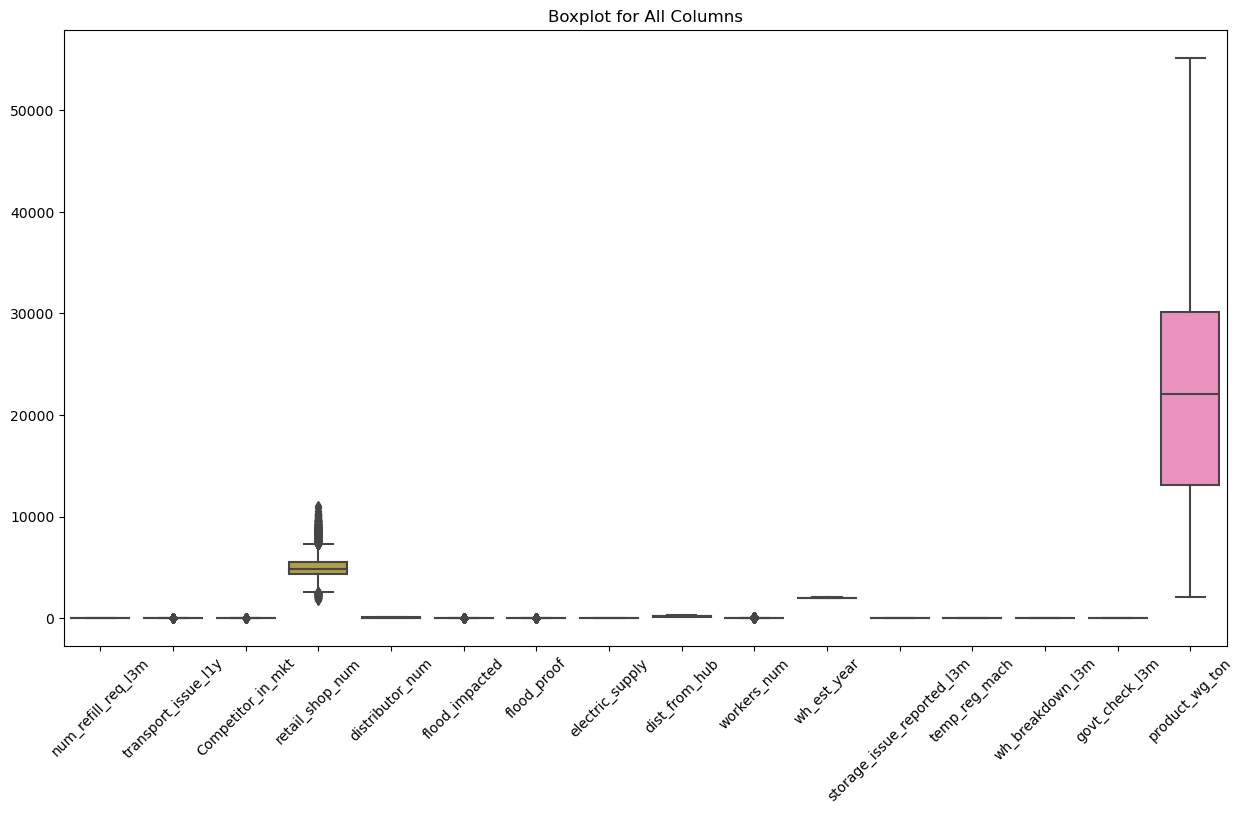

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns')

In [17]:
#Handling the outlier using the IQR approach (capping approach)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper Fence:",Upper_fence)
print('\n')
print("Lower Fence:",Lower_fence)

Upper Fence: num_refill_req_l3m               12.0
transport_issue_l1y               2.5
Competitor_in_mkt                 7.0
retail_shop_num                7280.5
distributor_num                  96.5
                               ...   
storage_issue_reported_l3m       45.0
temp_reg_mach                     2.5
wh_breakdown_l3m                  9.5
govt_check_l3m                   48.5
product_wg_ton                55669.0
Length: 16, dtype: float64


Lower Fence: num_refill_req_l3m               -4.0
transport_issue_l1y              -1.5
Competitor_in_mkt                -1.0
retail_shop_num                2532.5
distributor_num                 -11.5
                               ...   
storage_issue_reported_l3m      -11.0
temp_reg_mach                    -1.5
wh_breakdown_l3m                 -2.5
govt_check_l3m                  -11.5
product_wg_ton               -12507.0
Length: 16, dtype: float64


In [18]:
df['retail_shop_num']=np.where(df['retail_shop_num']>7280,7280,np.where(df['retail_shop_num']<2532,2532,df['retail_shop_num']))

In [19]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4958.874240,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2004.923920,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,969.364671,16.064329,0.297537,0.227281,0.474761,62.718609,7.715077,7.190079,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,2532.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2000.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2000.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,7280.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


Change in the min and max value of retail_shop_num column shows that capping has been applied or you can again apply boxplot
and see the change.
Now after outlier treatment, we move onto lable encoding.

# Lable encoding

Label encoding is a technique used in data preprocessing to convert categorical data into numerical format.
These are some way how label encoding works:

* Assigning Numbers to Categories:
Each unique category in a categorical variable is assigned a unique numerical label.

* Preserving Order (for Ordinal Data):
If the categorical variable is ordinal, the labels are assigned in a way that preserves the inherent order among the 
categories.

Various techniques to do this are: Label encoder, mapping technique, one-hot encoding.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [21]:
df['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [22]:
df['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [23]:
df['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [24]:
df['WH_regional_zone'].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

In [25]:
df['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [26]:
df['approved_wh_govt_certificate'].value_counts()

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [27]:
#mapping approach for cols that are binary
df['wh_owner_type']=df['wh_owner_type'].map({'Company Owned':1,'Rented':0})

In [28]:
df['Location_type']=df['Location_type'].map({'Rural':0,'Urban':1})

In [29]:
df['WH_capacity_size']=df['WH_capacity_size'].map({'Large':2,'Mid':1,'Small':0})

In [30]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].map({'A+':4,'A':3,'B+':2,'B':1,'C':0})

In [31]:
#using one hot encoding for cols that are not ordinal and non-binary

In [32]:
#df=pd.get_dummies(df,columns=['zone','WH_regional_zone'],prefix=['zone','region'],drop_first=False)

In [33]:
# Concatenate the original DataFrame with the new one-hot encoded columns
df = pd.concat([df, pd.get_dummies(df[['zone','WH_regional_zone']], prefix=['zone','region'], drop_first=False)], axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  int64  
 3   WH_capacity_size              25000 non-null  int64  
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  int64  
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [35]:
pd.set_option('display.max_columns',35)
df.head(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,zone_East,zone_North,zone_South,zone_West,region_Zone 1,region_Zone 2,region_Zone 3,region_Zone 4,region_Zone 5,region_Zone 6
0,WH_100000,EID_50000,1,0,West,Zone 6,3,1,2,4651,0,24,0,1,1,91,29.0,2000.0,13,0,3,5,15,17115,0,0,0,1,0,0,0,0,0,1
1,WH_100001,EID_50001,0,2,North,Zone 5,0,0,4,6217,1,47,0,0,1,210,31.0,2000.0,4,0,3,3,17,5074,0,1,0,0,0,0,0,0,1,0
2,WH_100002,EID_50002,0,1,South,Zone 2,1,0,4,4306,1,64,0,0,0,161,37.0,2000.0,17,0,3,6,22,23137,0,0,1,0,0,1,0,0,0,0
3,WH_100003,EID_50003,0,1,North,Zone 3,7,4,2,6000,0,50,0,0,0,103,21.0,2000.0,17,1,4,3,27,22115,0,1,0,0,0,0,1,0,0,0
4,WH_100004,EID_50004,0,2,North,Zone 5,3,1,2,4740,1,42,1,0,1,112,25.0,2009.0,18,0,0,6,24,24071,0,1,0,0,0,0,0,0,1,0
5,WH_100005,EID_50005,0,0,West,Zone 1,8,0,2,5053,0,37,0,0,1,152,35.0,2009.0,23,1,4,3,3,32134,0,0,0,1,1,0,0,0,0,0
6,WH_100006,EID_50006,0,2,West,Zone 6,8,0,4,4449,1,38,0,0,1,77,27.0,2010.0,24,0,1,3,6,30142,0,0,0,1,0,0,0,0,0,1
7,WH_100007,EID_50007,0,2,North,Zone 5,1,0,4,7183,0,45,0,0,0,241,23.0,2000.0,18,0,0,6,24,24093,0,1,0,0,0,0,0,0,1,0
8,WH_100008,EID_50008,0,0,South,Zone 6,8,1,4,5381,0,42,0,0,1,124,22.0,2013.0,13,1,4,5,2,18082,0,0,1,0,0,0,0,0,0,1
9,WH_100009,EID_50009,0,0,South,Zone 6,4,3,3,3869,1,35,0,0,0,78,43.0,2000.0,6,0,0,6,2,7130,0,0,1,0,0,0,0,0,0,1


In [36]:
df1=df.copy()

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  int64  
 3   WH_capacity_size              25000 non-null  int64  
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  int64  
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [38]:
pd.set_option('display.max_columns',35)
df1.head(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,zone_East,zone_North,zone_South,zone_West,region_Zone 1,region_Zone 2,region_Zone 3,region_Zone 4,region_Zone 5,region_Zone 6
0,WH_100000,EID_50000,1,0,West,Zone 6,3,1,2,4651,0,24,0,1,1,91,29.0,2000.0,13,0,3,5,15,17115,0,0,0,1,0,0,0,0,0,1
1,WH_100001,EID_50001,0,2,North,Zone 5,0,0,4,6217,1,47,0,0,1,210,31.0,2000.0,4,0,3,3,17,5074,0,1,0,0,0,0,0,0,1,0
2,WH_100002,EID_50002,0,1,South,Zone 2,1,0,4,4306,1,64,0,0,0,161,37.0,2000.0,17,0,3,6,22,23137,0,0,1,0,0,1,0,0,0,0
3,WH_100003,EID_50003,0,1,North,Zone 3,7,4,2,6000,0,50,0,0,0,103,21.0,2000.0,17,1,4,3,27,22115,0,1,0,0,0,0,1,0,0,0
4,WH_100004,EID_50004,0,2,North,Zone 5,3,1,2,4740,1,42,1,0,1,112,25.0,2009.0,18,0,0,6,24,24071,0,1,0,0,0,0,0,0,1,0
5,WH_100005,EID_50005,0,0,West,Zone 1,8,0,2,5053,0,37,0,0,1,152,35.0,2009.0,23,1,4,3,3,32134,0,0,0,1,1,0,0,0,0,0
6,WH_100006,EID_50006,0,2,West,Zone 6,8,0,4,4449,1,38,0,0,1,77,27.0,2010.0,24,0,1,3,6,30142,0,0,0,1,0,0,0,0,0,1
7,WH_100007,EID_50007,0,2,North,Zone 5,1,0,4,7183,0,45,0,0,0,241,23.0,2000.0,18,0,0,6,24,24093,0,1,0,0,0,0,0,0,1,0
8,WH_100008,EID_50008,0,0,South,Zone 6,8,1,4,5381,0,42,0,0,1,124,22.0,2013.0,13,1,4,5,2,18082,0,0,1,0,0,0,0,0,0,1
9,WH_100009,EID_50009,0,0,South,Zone 6,4,3,3,3869,1,35,0,0,0,78,43.0,2000.0,6,0,0,6,2,7130,0,0,1,0,0,0,0,0,0,1


Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves exploring and understanding the
characteristics of a dataset. EDA helps to uncover patterns, relationships, anomalies, and key insights that can guide 
further analysis and decision-making. 
we generally use visualization libraries such as Seaborn and Matplotlib for creating informative plots during EDA.

In [39]:
#Basic preprocessing of data is complete. So, now we move to visualization part.

<Axes: xlabel='temp_reg_mach', ylabel='count'>

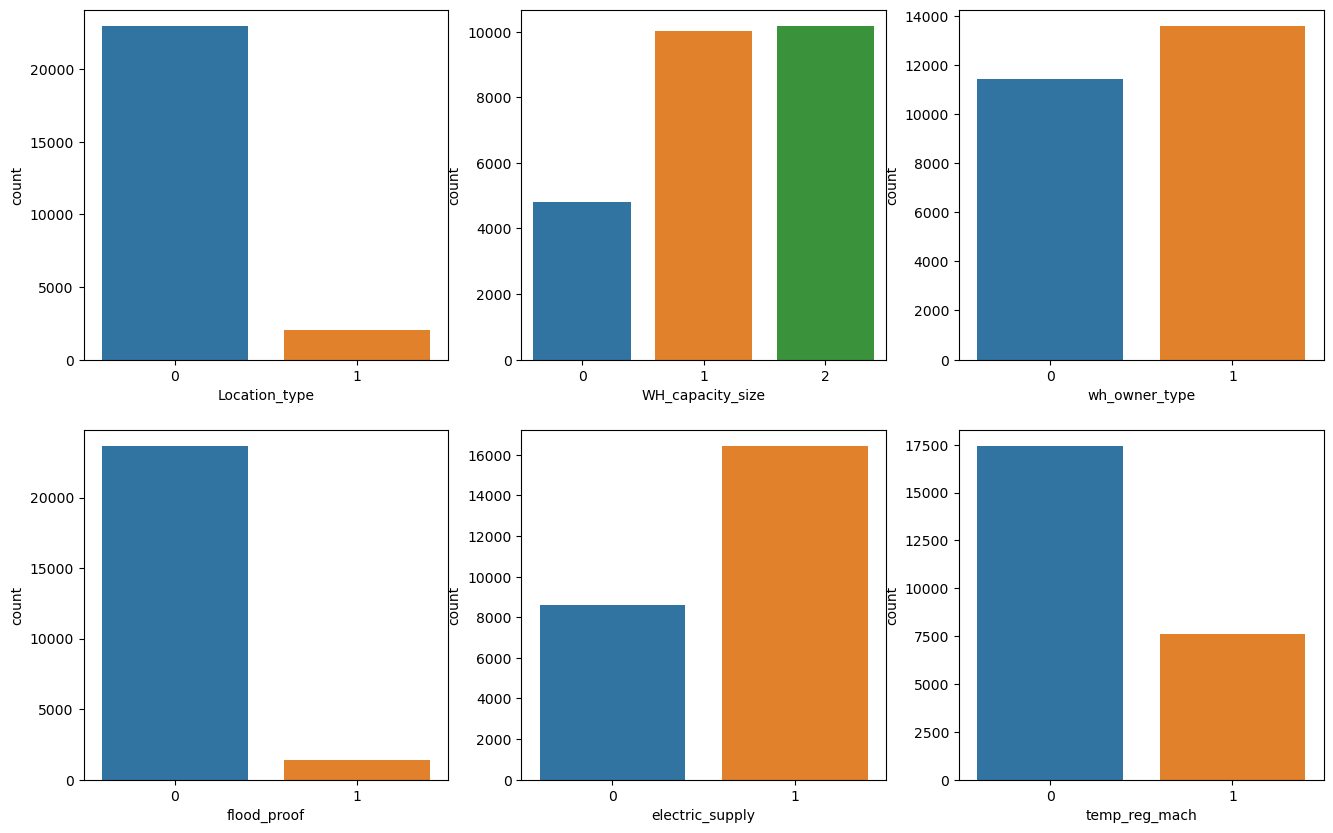

In [40]:
plt.subplots(2,3,figsize=(16,10))

plt.subplot(2,3,1)
sns.countplot(x='Location_type',data=df)

plt.subplot(2,3,2)
sns.countplot(x='WH_capacity_size',data=df)

plt.subplot(2,3,3)
sns.countplot(x='wh_owner_type',data=df)

plt.subplot(2,3,4)
sns.countplot(x='flood_proof',data=df)

plt.subplot(2,3,5)
sns.countplot(x='electric_supply',data=df)

plt.subplot(2,3,6)
sns.countplot(x='temp_reg_mach',data=df)




In [41]:
df['flood_impacted'].value_counts()

0    22546
1     2454
Name: flood_impacted, dtype: int64

In [42]:
# df1=df[df['flood_impacted']==1]
# df1['flood_proof'].value_counts()
#sns.countplot(x='flood_proof',data=df1)

([<matplotlib.patches.Wedge at 0x26f1512c9d0>,
 [Text(-1.0838334605431044, 0.18789632728491312, '0'),
  Text(1.0838334627421198, -0.18789631460043682, '1')],
 [Text(-0.591181887568966, 0.10248890579177078, '94.54%'),
  Text(0.5911818887684289, -0.10248889887296553, '5.46%')])

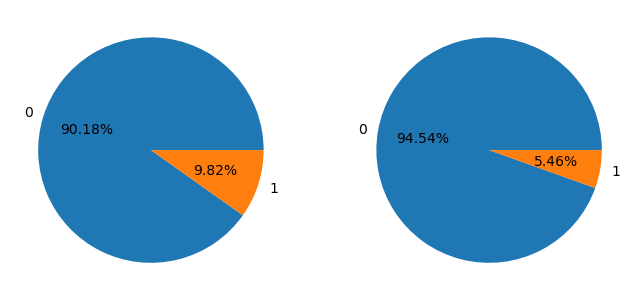

In [43]:

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(df['flood_impacted'].value_counts(), labels=df['flood_impacted'].value_counts().index,autopct='%0.2f%%',data=df)

plt.subplot(1,2,2)
plt.pie(df['flood_proof'].value_counts(), labels=df['flood_proof'].value_counts().index,autopct='%0.2f%%',data=df)

<Axes: xlabel='workers_num', ylabel='Count'>

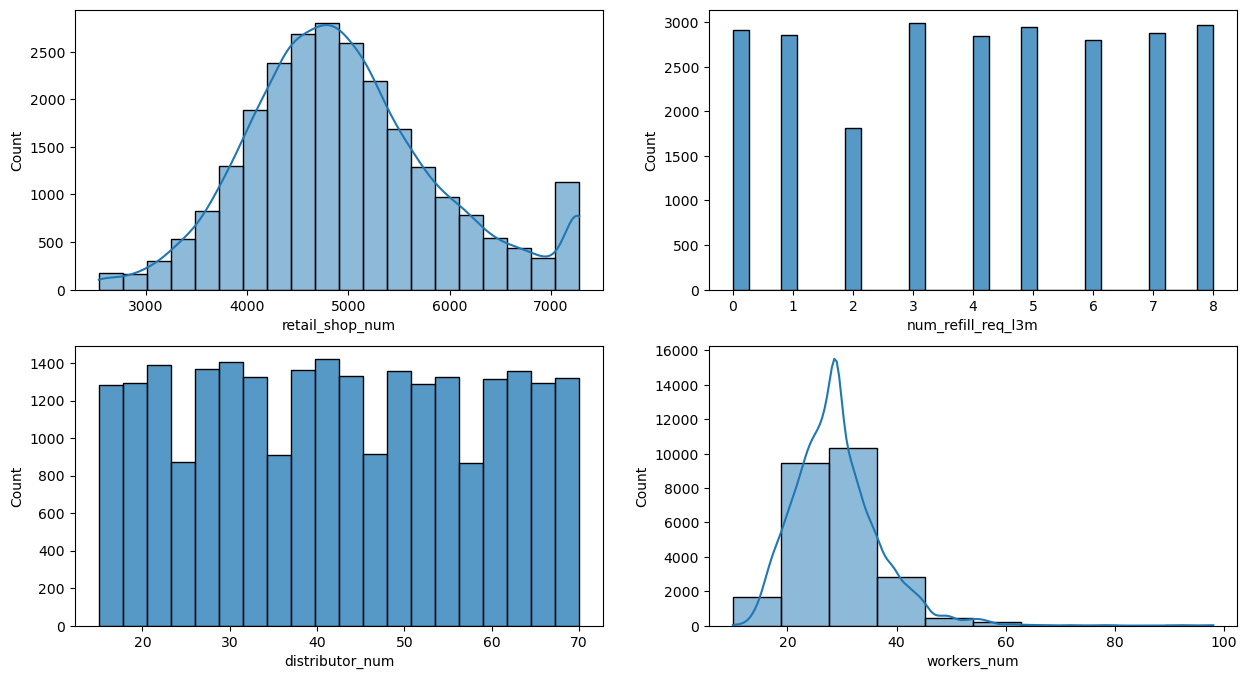

In [44]:
plt.subplots(2,2,figsize=(15,8))

plt.subplot(2,2,1)
sns.histplot(df['retail_shop_num'],bins=20,kde=True)

plt.subplot(2,2,2)
sns.histplot(df['num_refill_req_l3m'])

plt.subplot(2,2,3)
sns.histplot(df['distributor_num'],bins=20)

plt.subplot(2,2,4)
sns.histplot(df['workers_num'],kde=True,bins=10)

In [45]:
#sns.countplot(x='zone',data=df)
df['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

([<matplotlib.patches.Wedge at 0x26f184752d0>,
 [Text(0.549321529800532, 0.9530193371058132, 'Zone 6'),
  Text(-0.9810467219618033, 0.49754128404384734, 'Zone 5'),
  Text(-0.887638253454409, -0.6496909503790294, 'Zone 4'),
  Text(-0.04601725643774172, -1.0990370385523607, 'Zone 2'),
  Text(0.7023372489618073, -0.8465945834463864, 'Zone 3'),
  Text(1.0635606180413169, -0.28078249901226476, 'Zone 1')],
 [Text(0.2996299253457447, 0.5198287293304436, '33.36%'),
  Text(-0.5351163937973472, 0.2713861549330076, '18.35%'),
  Text(-0.48416632006604127, -0.35437688202492507, '16.70%'),
  Text(-0.025100321693313662, -0.5994747483012876, '11.85%'),
  Text(0.3830930448882585, -0.4617788636980289, '11.52%'),
  Text(0.5801239734770818, -0.15315409037032623, '8.22%')])

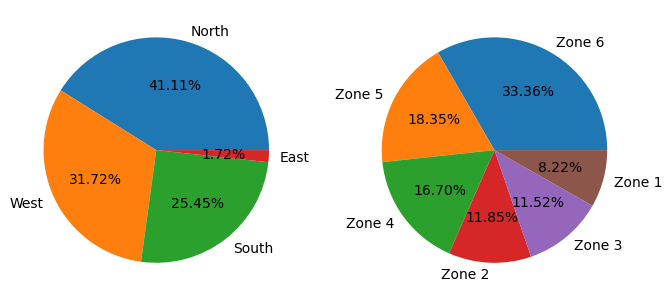

In [46]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(df['zone'].value_counts(), labels=df['zone'].value_counts().index,autopct='%0.2f%%',data=df)

plt.subplot(1,2,2)
plt.pie(df['WH_regional_zone'].value_counts(), labels=df['WH_regional_zone'].value_counts().index,autopct='%0.2f%%',data=df)

Text(0.5, 1.0, 'Zone wise Location type')

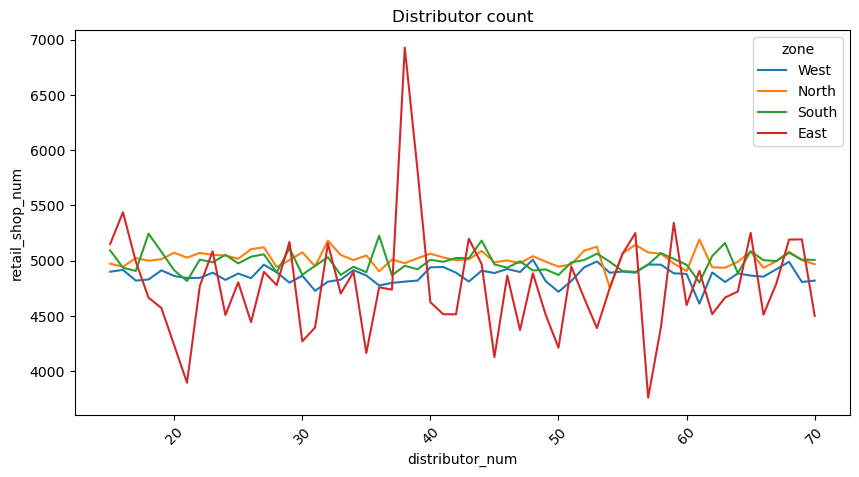

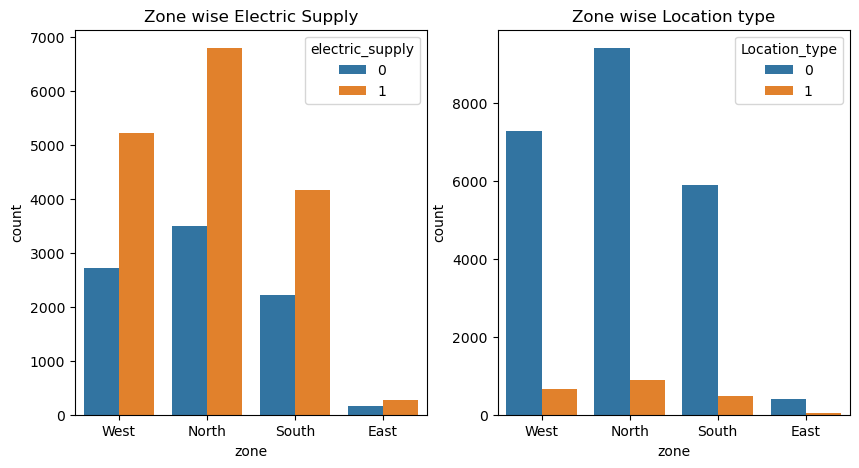

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(x='distributor_num',y='retail_shop_num',hue='zone',data=df,ci=None)
plt.title('Distributor count')
plt.xticks(rotation=45)


plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='zone',hue='electric_supply',data=df)
plt.title('Zone wise Electric Supply')

plt.subplot(1,2,2)
sns.countplot(x='zone',hue='Location_type',data=df)
plt.title('Zone wise Location type')




Text(0.5, 1.0, 'Impact of electricity supply on no. of workers over years')

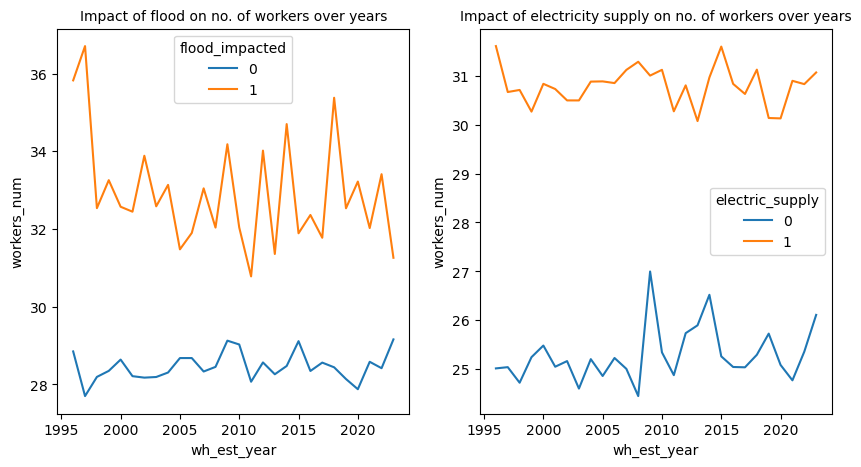

In [48]:
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sns.lineplot(x='wh_est_year',y='workers_num',hue='flood_impacted',data=df,ci=None)
plt.title('Impact of flood on no. of workers over years',fontsize=10)

plt.subplot(1,2,2)
sns.lineplot(x='wh_est_year',y='workers_num',hue='electric_supply',data=df,ci=None)
plt.title('Impact of electricity supply on no. of workers over years',fontsize=10)

Text(0.5, 1.0, 'Count of no of breakdowns over the establisment years')

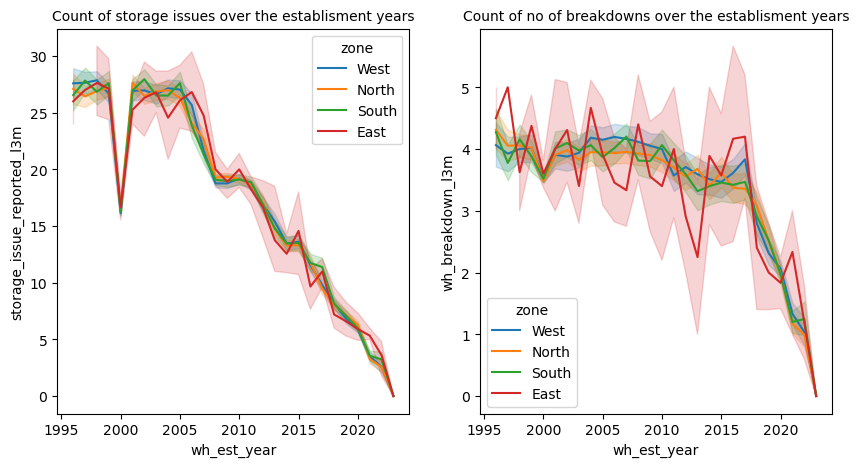

In [49]:
plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sns.lineplot(x='wh_est_year',y='storage_issue_reported_l3m',hue='zone',data=df)
plt.title('Count of storage issues over the establisment years',fontsize=10)

plt.subplot(1,2,2)
sns.lineplot(x='wh_est_year',y='wh_breakdown_l3m',hue='zone',data=df)
plt.title('Count of no of breakdowns over the establisment years',fontsize=10)

In [50]:
df['transport_issue_l1y'].value_counts()

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: transport_issue_l1y, dtype: int64

<Axes: xlabel='zone', ylabel='count'>

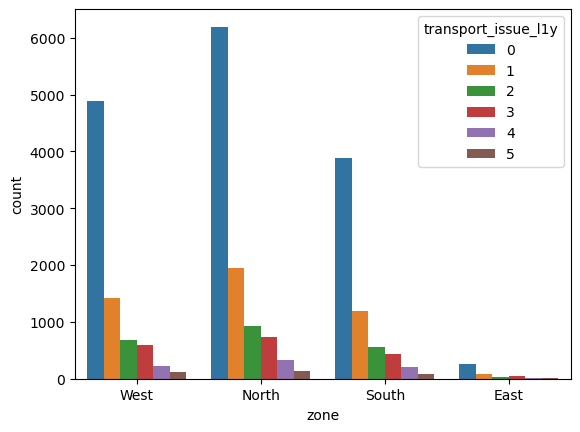

In [51]:
sns.countplot(x='zone',hue='transport_issue_l1y',data=df)

Text(0.5, 1.0, 'Pie chart displaying % for transport issues in south zone in last one year')

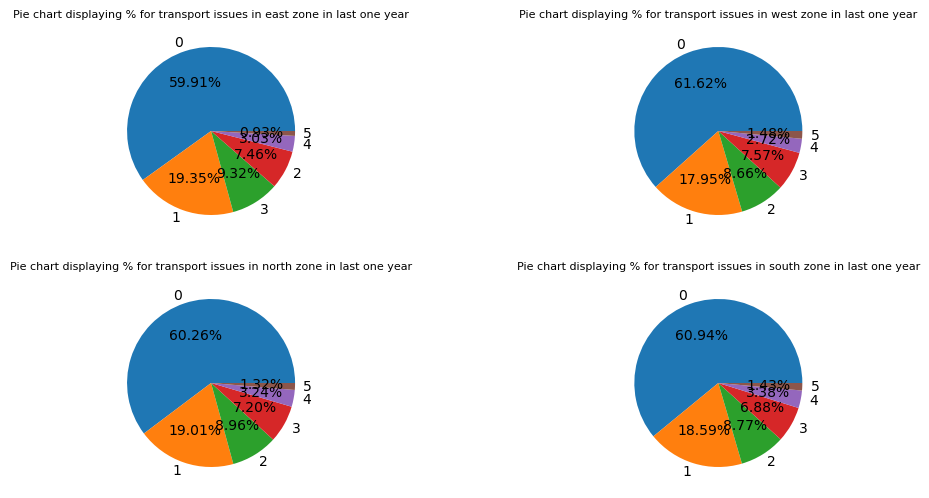

In [52]:
plt.subplots(2,2,figsize=(12,6))

plt.subplot(2,2,1)
filter_east = df[df['zone'] == 'East']
plt.pie(filter_east['transport_issue_l1y'].value_counts(), labels=filter_east['transport_issue_l1y'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Pie chart displaying % for transport issues in east zone in last one year',fontsize=8)

plt.subplot(2,2,2)
filter_west = df[df['zone'] == 'West']
plt.pie(filter_west['transport_issue_l1y'].value_counts(), labels=filter_west['transport_issue_l1y'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Pie chart displaying % for transport issues in west zone in last one year',fontsize=8)

plt.subplot(2,2,3)
filter_north = df[df['zone'] == 'North']
plt.pie(filter_north['transport_issue_l1y'].value_counts(), labels=filter_north['transport_issue_l1y'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Pie chart displaying % for transport issues in north zone in last one year',fontsize=8)

plt.subplot(2,2,4)
filter_south = df[df['zone'] == 'South']
plt.pie(filter_south['transport_issue_l1y'].value_counts(), labels=filter_south['transport_issue_l1y'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Pie chart displaying % for transport issues in south zone in last one year',fontsize=8)

Text(0.5, 1.0, 'Pie chart displaying % in each zone for three competitors')

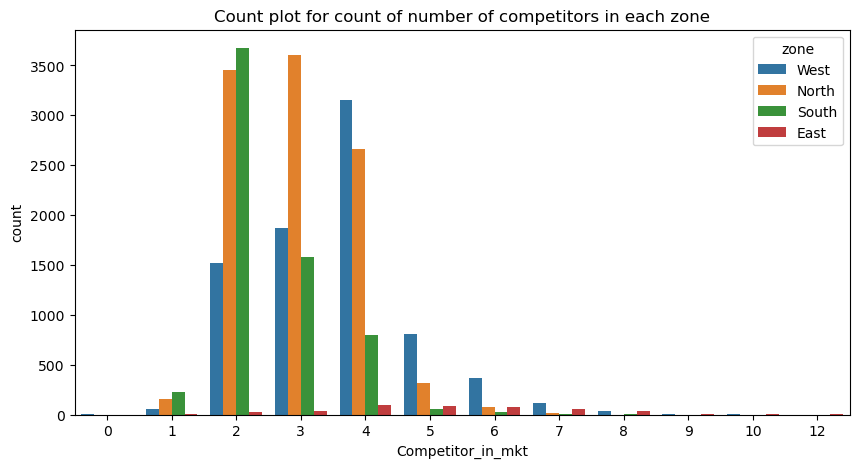

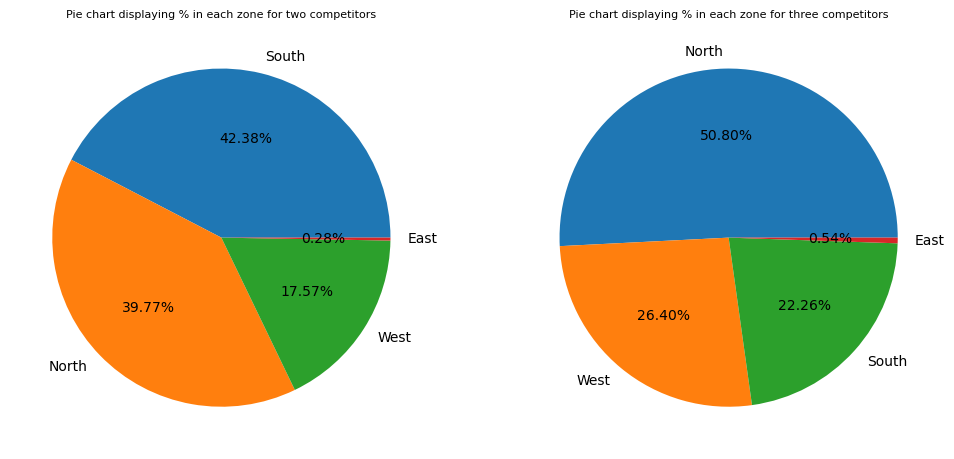

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='Competitor_in_mkt',hue='zone',data=df)
plt.title('Count plot for count of number of competitors in each zone')

plt.subplots(1,2,figsize=(12,6))

plt.subplot(1,2,1)
filter_df = df[df['Competitor_in_mkt'] == 2]
plt.pie(filter_df['zone'].value_counts(), labels=filter_df['zone'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Pie chart displaying % in each zone for two competitors',fontsize=8)

plt.subplot(1,2,2)
filter_df = df[df['Competitor_in_mkt'] == 3]
plt.pie(filter_df['zone'].value_counts(), labels=filter_df['zone'].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Pie chart displaying % in each zone for three competitors',fontsize=8)

<Axes: xlabel='approved_wh_govt_certificate', ylabel='count'>

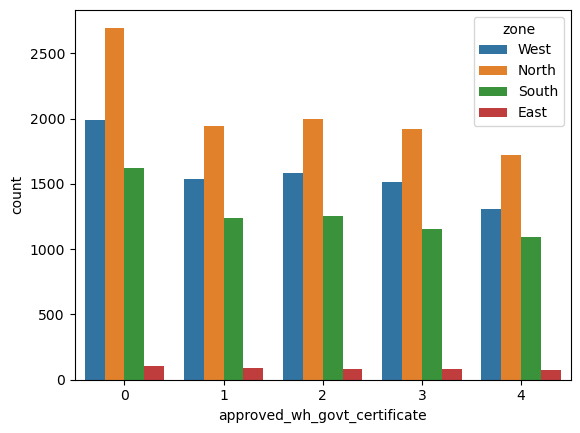

In [54]:
sns.countplot(x='approved_wh_govt_certificate',hue='zone',data=df)

<Axes: xlabel='wh_est_year', ylabel='govt_check_l3m'>

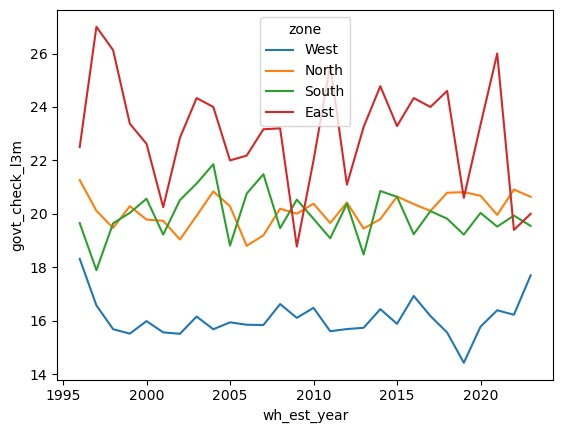

In [55]:
sns.lineplot(y='govt_check_l3m',x='wh_est_year',hue='zone',data=df,ci=None)

<Axes: >

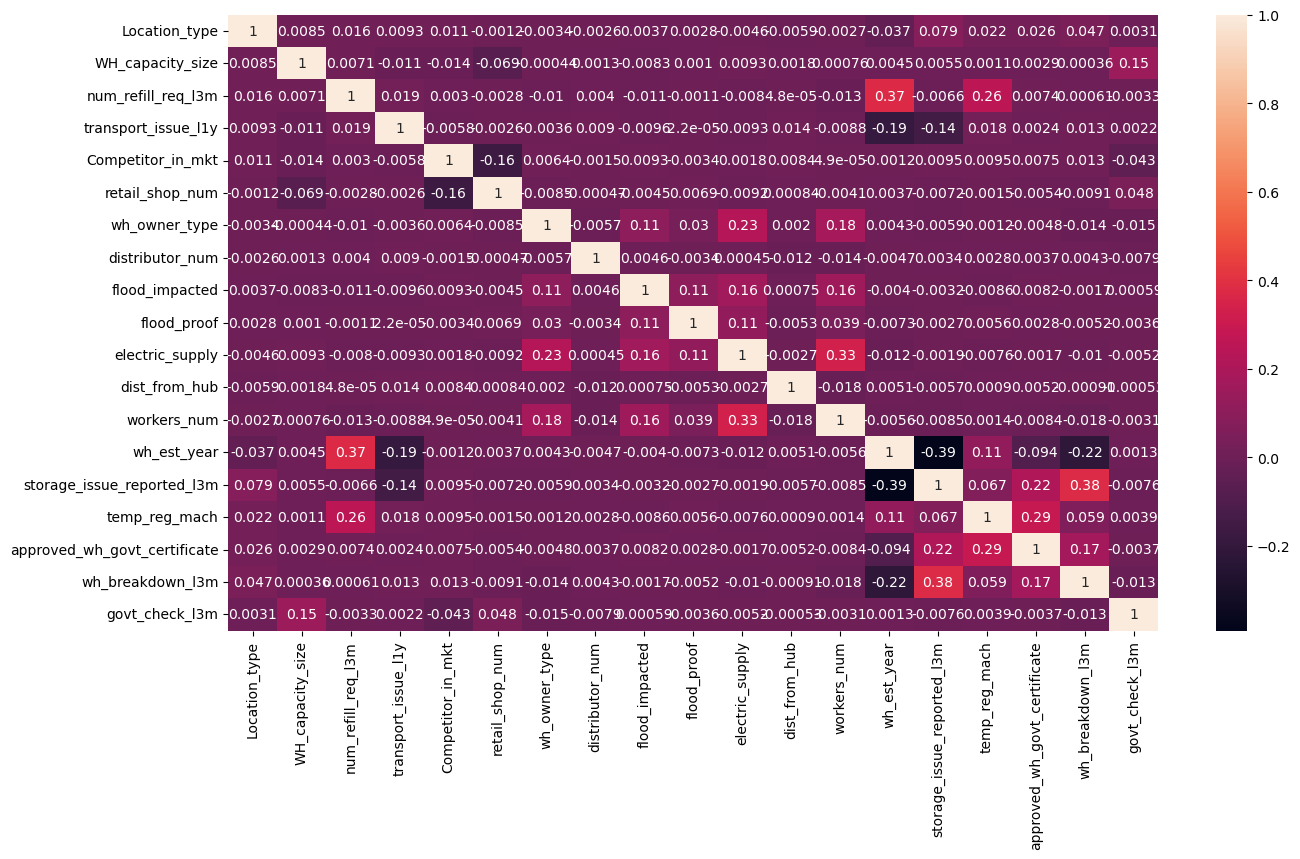

In [56]:
df_corr=df[['Location_type','WH_capacity_size','zone','WH_regional_zone','num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','wh_owner_type','distributor_num','flood_impacted','flood_proof','electric_supply','dist_from_hub','workers_num','wh_est_year','storage_issue_reported_l3m','temp_reg_mach','approved_wh_govt_certificate','wh_breakdown_l3m','govt_check_l3m']]
plt.figure(figsize=(15,8))
sns.heatmap(df_corr.corr(),annot=True)

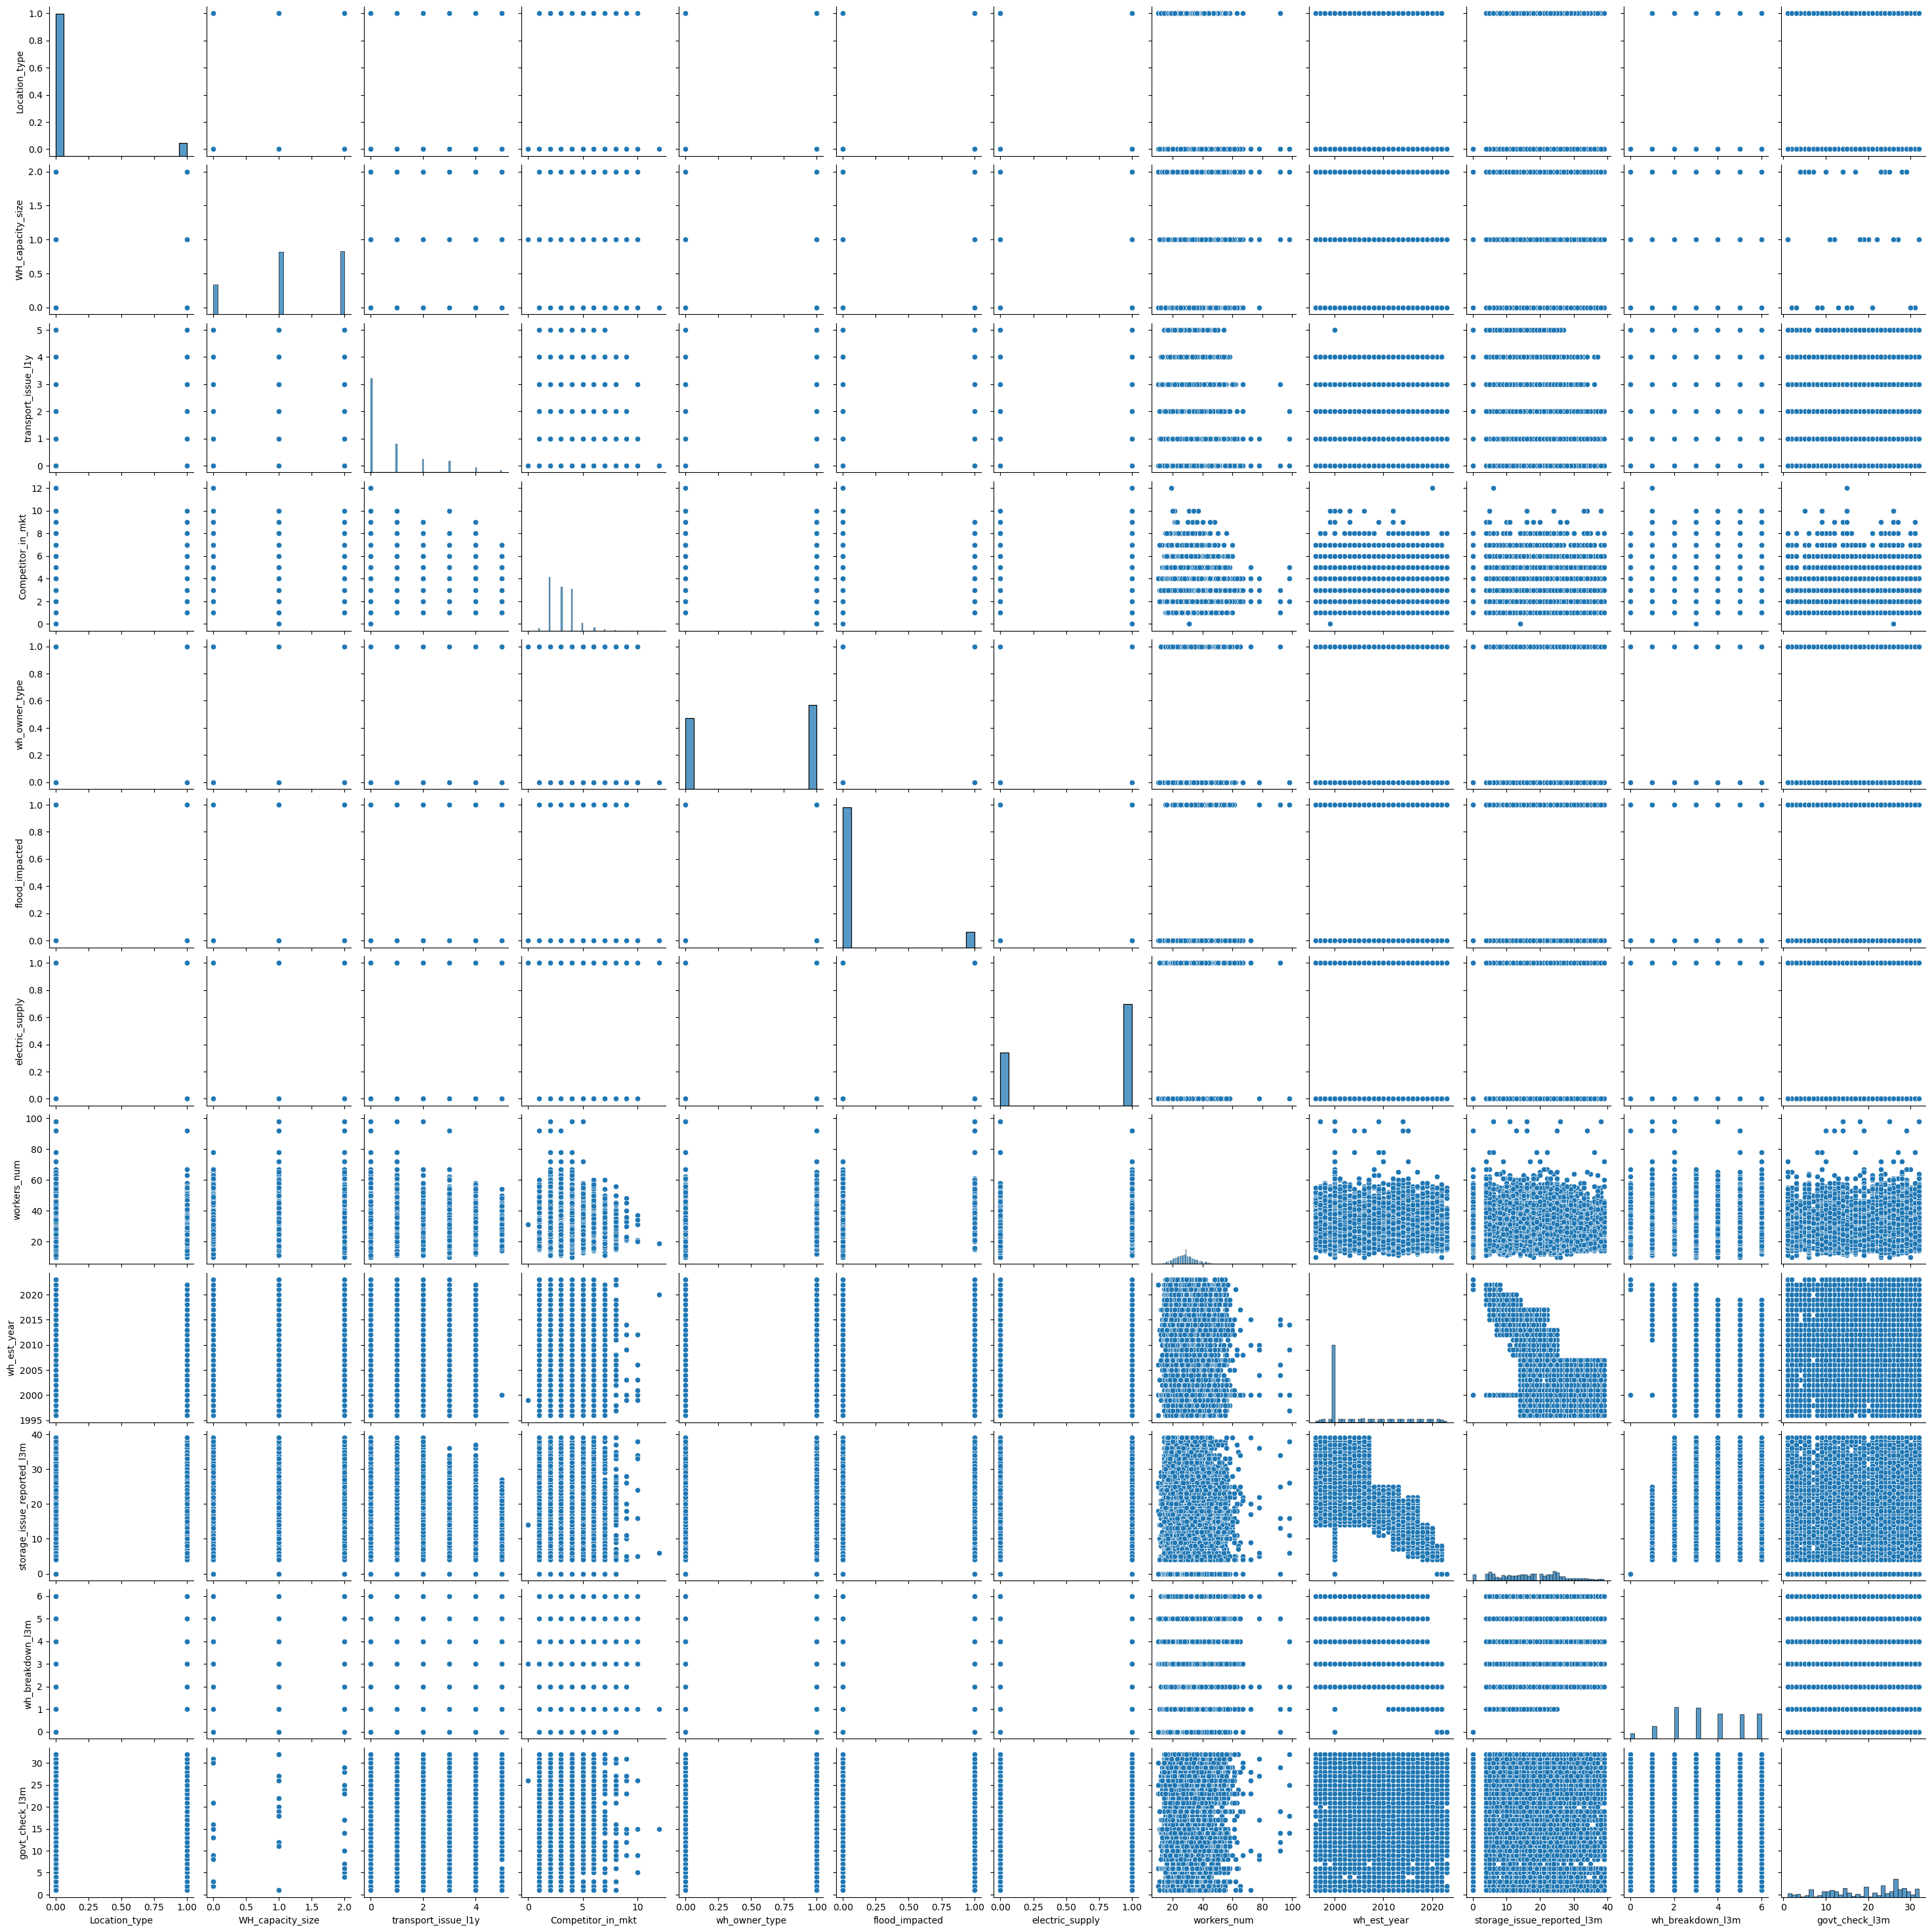

In [57]:
df_corr=df[['Location_type','WH_capacity_size','zone','transport_issue_l1y','Competitor_in_mkt','wh_owner_type','flood_impacted','electric_supply','workers_num','wh_est_year','storage_issue_reported_l3m','wh_breakdown_l3m','govt_check_l3m']]
sns.pairplot(df_corr)

#EDA completes here. Write analysis later.
#Now we move to model building part

In [58]:
#Splitting and scaling the data

X=df.drop(['Ware_house_ID', 'WH_Manager_ID','zone','WH_regional_zone','product_wg_ton'],axis=1)
Y=df['product_wg_ton']

In [59]:
X.head()

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,zone_East,zone_North,zone_South,zone_West,region_Zone 1,region_Zone 2,region_Zone 3,region_Zone 4,region_Zone 5,region_Zone 6
0,1,0,3,1,2,4651,0,24,0,1,1,91,29.0,2000.0,13,0,3,5,15,0,0,0,1,0,0,0,0,0,1
1,0,2,0,0,4,6217,1,47,0,0,1,210,31.0,2000.0,4,0,3,3,17,0,1,0,0,0,0,0,0,1,0
2,0,1,1,0,4,4306,1,64,0,0,0,161,37.0,2000.0,17,0,3,6,22,0,0,1,0,0,1,0,0,0,0
3,0,1,7,4,2,6000,0,50,0,0,0,103,21.0,2000.0,17,1,4,3,27,0,1,0,0,0,0,1,0,0,0
4,0,2,3,1,2,4740,1,42,1,0,1,112,25.0,2009.0,18,0,0,6,24,0,1,0,0,0,0,0,0,1,0


In [60]:
X.shape

(25000, 29)

In [61]:
pd.set_option('display.max_rows',50)
df.skew()

Location_type                   3.054017
WH_capacity_size               -0.367559
num_refill_req_l3m             -0.075217
transport_issue_l1y             1.610907
Competitor_in_mkt               0.978456
retail_shop_num                 0.434987
wh_owner_type                  -0.173135
distributor_num                 0.015213
flood_impacted                  2.701327
flood_proof                     3.919343
electric_supply                -0.660933
dist_from_hub                  -0.005999
workers_num                     1.081539
wh_est_year                     1.050434
storage_issue_reported_l3m      0.113345
temp_reg_mach                   0.855960
approved_wh_govt_certificate    0.141282
wh_breakdown_l3m               -0.068026
govt_check_l3m                 -0.363262
product_wg_ton                  0.331631
zone_East                       7.436340
zone_North                      0.361295
zone_South                      1.127422
zone_West                       0.785433
region_Zone 1   

In [62]:
pd.set_option('display.max_rows',50)
df.kurtosis()

Location_type                    7.327604
WH_capacity_size                -1.123903
num_refill_req_l3m              -1.220697
transport_issue_l1y              1.838439
Competitor_in_mkt                1.786368
retail_shop_num                  0.073084
wh_owner_type                   -1.970182
distributor_num                 -1.187564
flood_impacted                   5.297593
flood_proof                     13.362321
electric_supply                 -1.563292
dist_from_hub                   -1.200682
workers_num                      3.673585
wh_est_year                     -0.321110
storage_issue_reported_l3m      -0.680142
temp_reg_mach                   -1.267434
approved_wh_govt_certificate    -1.308131
wh_breakdown_l3m                -0.952149
govt_check_l3m                  -1.057342
product_wg_ton                  -0.502022
zone_East                       53.303418
zone_North                      -1.869615
zone_South                      -0.728978
zone_West                       -1

In [63]:
#skewness and kurtosis show that data is normally distributed so we can use StandardScaler

In [64]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

In [65]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [66]:
X_scaled

array([[ 3.35214954, -1.63254736, -0.41780748, ..., -0.44781452,
        -0.47403559,  1.41349262],
       [-0.29831605,  1.05627825, -1.56874998, ..., -0.44781452,
         2.10954623, -0.70746744],
       [-0.29831605, -0.28813455, -1.18510248, ..., -0.44781452,
        -0.47403559, -0.70746744],
       ...,
       [ 3.35214954,  1.05627825,  1.11678253, ..., -0.44781452,
         2.10954623, -0.70746744],
       [-0.29831605, -1.63254736, -1.18510248, ..., -0.44781452,
        -0.47403559, -0.70746744],
       [-0.29831605, -0.28813455,  1.50043003, ...,  2.23306741,
        -0.47403559, -0.70746744]])

In [67]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [68]:
X_scaled

,Location_type,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,zone_East,zone_North,zone_South,zone_West,region_Zone 1,region_Zone 2,region_Zone 3,region_Zone 4,region_Zone 5,region_Zone 6
0,3.352150,-1.632547,-0.417807,0.188690,-0.967205,-0.317610,-1.090302,-1.146546,-0.329915,4.159520,0.722737,-1.156575,0.007207,-0.684835,-0.450876,-0.659770,0.827956,0.898041,-0.441634,-0.132135,-0.835547,-0.584248,1.467034,-0.29919,-0.366682,-0.360902,-0.447815,-0.474036,1.413493
1,-0.298316,1.056278,-1.568750,-0.645043,0.784661,1.297913,0.917177,0.285226,-0.329915,-0.240412,0.722737,0.740827,0.266445,-0.684835,-1.433309,-0.659770,0.827956,-0.285180,-0.209944,-0.132135,1.196821,-0.584248,-0.681648,-0.29919,-0.366682,-0.360902,-0.447815,2.109546,-0.707467
2,-0.298316,-0.288135,-1.185102,-0.645043,0.784661,-0.673521,0.917177,1.343493,-0.329915,-0.240412,-1.383630,-0.040456,1.044158,-0.684835,-0.014239,-0.659770,0.827956,1.489652,0.369282,-0.132135,-0.835547,1.711602,-0.681648,-0.29919,2.727159,-0.360902,-0.447815,-0.474036,-0.707467
3,-0.298316,-0.288135,1.116783,2.689890,-0.967205,1.074050,-1.090302,0.471979,-0.329915,-0.240412,-1.383630,-0.965240,-1.029744,-0.684835,-0.014239,1.515679,1.527787,-0.285180,0.948508,-0.132135,1.196821,-0.584248,-0.681648,-0.29919,-0.366682,2.770838,-0.447815,-0.474036,-0.707467
4,-0.298316,1.056278,-0.417807,0.188690,-0.967205,-0.225796,0.917177,-0.026028,3.031081,-0.240412,0.722737,-0.821739,-0.511269,0.566915,0.094921,-0.659770,-1.271537,1.489652,0.600972,-0.132135,1.196821,-0.584248,-0.681648,-0.29919,-0.366682,-0.360902,-0.447815,2.109546,-0.707467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.298316,-1.632547,-0.417807,-0.645043,0.784661,0.444760,-1.090302,-1.457801,-0.329915,-0.240412,0.722737,-0.343403,0.655302,0.010581,0.531558,1.515679,0.827956,-0.876791,1.296044,-0.132135,1.196821,-0.584248,-0.681648,3.34236,-0.366682,-0.360902,-0.447815,-0.474036,-0.707467
24996,-0.298316,-0.288135,0.733135,-0.645043,0.784661,-0.483702,0.917177,0.907736,-0.329915,-0.240412,0.722737,-0.534737,-0.122412,0.984165,-0.778354,-0.659770,-0.571706,0.306431,-0.094099,-0.132135,-0.835547,-0.584248,1.467034,-0.29919,2.727159,-0.360902,-0.447815,-0.474036,-0.707467
24997,3.352150,1.056278,1.116783,-0.645043,-0.967205,0.458171,-1.090302,-0.710789,3.031081,-0.240412,0.722737,-0.263680,0.000000,-0.684835,0.640717,-0.659770,0.128125,0.898041,0.716818,-0.132135,-0.835547,1.711602,-0.681648,-0.29919,-0.366682,-0.360902,-0.447815,2.109546,-0.707467
24998,-0.298316,-1.632547,-1.185102,-0.645043,-0.967205,2.394529,-1.090302,-1.084295,-0.329915,-0.240412,0.722737,-1.650856,-0.511269,-0.684835,0.094921,-0.659770,0.827956,1.489652,1.296044,-0.132135,1.196821,-0.584248,-0.681648,3.34236,-0.366682,-0.360902,-0.447815,-0.474036,-0.707467


In [69]:
# split in training testing dataset, so we use simple random selection method here

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=100,train_size=0.8)

In [72]:
X_train.shape

(20000, 29)

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
# Perform feature selection using RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [75]:
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


In [76]:
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
14,storage_issue_reported_l3m,0.983032
16,approved_wh_govt_certificate,0.008985
13,wh_est_year,0.001452
15,temp_reg_mach,0.000733
3,transport_issue_l1y,0.000707
5,retail_shop_num,0.000705
11,dist_from_hub,0.000671
7,distributor_num,0.000636
12,workers_num,0.000563
17,wh_breakdown_l3m,0.000484


In [77]:
# Select features based on importance
sfm = SelectFromModel(rf, threshold=0.0001)
sfm.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                threshold=0.0001)

In [78]:
# Transform the data to include only important features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

In [79]:
X_train_selected

array([[ 1.05627825,  0.34948753, -0.64504266, ..., -1.27153706,
         1.48965185,  1.06435322],
       [ 1.05627825,  1.11678253, -0.64504266, ...,  1.52778721,
        -0.28517998,  0.71681763],
       [ 1.05627825,  1.50043003, -0.64504266, ...,  0.12812507,
         0.89804124,  1.18019842],
       ...,
       [ 1.05627825,  1.11678253,  1.02242363, ...,  1.52778721,
         0.30643063, -0.55747952],
       [-1.63254736, -0.41780748,  1.02242363, ...,  0.12812507,
        -0.87679059, -0.32578913],
       [ 1.05627825,  1.50043003,  0.18869048, ...,  0.12812507,
        -0.28517998,  0.48512724]])

In [80]:
X_test_selected

array([[-0.28813455,  0.34948753,  0.18869048, ...,  0.12812507,
        -1.4684012 ,  0.83266283],
       [ 1.05627825, -1.18510248,  1.02242363, ...,  1.52778721,
         0.89804124,  1.18019842],
       [-0.28813455,  0.73313503,  1.02242363, ..., -1.27153706,
         0.89804124, -2.06346706],
       ...,
       [-0.28813455, -0.41780748, -0.64504266, ...,  0.12812507,
        -1.4684012 ,  0.02174646],
       [ 1.05627825, -1.18510248, -0.64504266, ...,  0.82795614,
         0.30643063,  1.18019842],
       [ 1.05627825,  0.73313503, -0.64504266, ..., -0.571706  ,
         0.30643063, -1.48424108]])

In [81]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_selected, Y_train)
lr_pred = lr.predict(X_test_selected)
lr_mse = mean_squared_error(Y_test, lr_pred)
lr_mae = mean_absolute_error(Y_test, lr_pred)
lr_rmse = mean_squared_error(Y_test, lr_pred, squared=False)
lr_r2 = r2_score(Y_test, lr_pred)
lr_mape=np.mean(np.abs((Y_test - lr_pred) / Y_test)) * 100
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R2_SCORE: {lr_r2}")
print(f"Linear Regression MAPE: {lr_mape}")

Linear Regression MSE: 2960631.0612800545
Linear Regression MAE: 1274.0994122422
Linear Regression RMSE: 1720.6484420938677
Linear Regression R2_SCORE: 0.9774537896540773
Linear Regression MAPE: 9.179707052045257


In [82]:
# Random Forest Regression
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, Y_train)
rf_pred = rf_selected.predict(X_test_selected)
rf_mse = mean_squared_error(Y_test, rf_pred)
rf_mae = mean_absolute_error(Y_test, rf_pred)
rf_rmse = mean_squared_error(Y_test, rf_pred, squared=False)
rf_r2 = r2_score(Y_test, rf_pred)
rf_mape=np.mean(np.abs((Y_test - rf_pred) / Y_test)) * 100
print(f"Random Forest Regression MSE: {rf_mse}")
print(f"Random Forest Regression MAE: {rf_mae}")
print(f"Random Forest Regression RMSE: {rf_rmse}")
print(f"Random Forest Regression R2_SCORE: {rf_r2}")
print(f"Random Forest Regression MAPE: {rf_mape}")


Random Forest Regression MSE: 823980.9654788399
Random Forest Regression MAE: 664.4083439999999
Random Forest Regression RMSE: 907.733972857048
Random Forest Regression R2_SCORE: 0.9937251052953926
Random Forest Regression MAPE: 4.228433957249708


In [83]:
#AdaBoost Regressor

ad_model=AdaBoostRegressor()
ad_model.fit(X_train_selected, Y_train)
ad_pred = ad_model.predict(X_test_selected)
ad_mse = mean_squared_error(Y_test, ad_pred)
ad_mae = mean_absolute_error(Y_test, ad_pred)
ad_rmse = mean_squared_error(Y_test, ad_pred, squared=False)
ad_r2 = r2_score(Y_test, ad_pred)
ad_mape=np.mean(np.abs((Y_test - ad_pred) / Y_test)) * 100
print(f"Ada Boost Regression MSE: {ad_mse}")
print(f"Ada Boost Regression MAE: {ad_mae}")
print(f"Ada Boost Regression RMSE: {ad_rmse}")
print(f"Ada Boost Regression R2_SCORE: {ad_r2}")
print(f"Ada Boost Regression MAPE: {ad_mape}")

Ada Boost Regression MSE: 2888774.942302859
Ada Boost Regression MAE: 1355.6045862974238
Ada Boost Regression RMSE: 1699.6396507209577
Ada Boost Regression R2_SCORE: 0.9780009983874751
Ada Boost Regression MAPE: 10.123410771819508


In [84]:
#GradientBoosting

gd_model=GradientBoostingRegressor()
gd_model.fit(X_train_selected, Y_train)
gd_pred = gd_model.predict(X_test_selected)
gd_mse = mean_squared_error(Y_test, gd_pred)
gd_mae = mean_absolute_error(Y_test, gd_pred)
gd_rmse = mean_squared_error(Y_test, gd_pred, squared=False)
gd_r2 = r2_score(Y_test, gd_pred)
gd_mape=np.mean(np.abs((Y_test - gd_pred) / Y_test)) * 100
print(f"Gradient Boosting Regression MSE: {gd_mse}")
print(f"Gradient Boosting Regression MAE: {gd_mae}")
print(f"Gradient Boosting Regression RMSE: {gd_rmse}")
print(f"Gradient Boosting Regression R2_SCORE: {gd_r2}")
print(f"Gradient Boosting Regression MAPE: {gd_mape}")

Gradient Boosting Regression MSE: 788160.8319387886
Gradient Boosting Regression MAE: 663.8061571965076
Gradient Boosting Regression RMSE: 887.784226002461
Gradient Boosting Regression R2_SCORE: 0.9939978877693642
Gradient Boosting Regression MAPE: 4.264621321129136


In [85]:
#XGBoost

xgb_model=XGBRegressor()
xgb_model.fit(X_train_selected, Y_train)
xgb_pred = xgb_model.predict(X_test_selected)
xgb_mse = mean_squared_error(Y_test, xgb_pred)
xgb_mae = mean_absolute_error(Y_test, xgb_pred)
xgb_rmse = mean_squared_error(Y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(Y_test, xgb_pred)
xgb_mape=np.mean(np.abs((Y_test - xgb_pred) / Y_test)) * 100
print(f"XGBoost Regression MSE: {xgb_mse}")
print(f"XGBoost Regression MAE: {xgb_mae}")
print(f"XGBoost Regression RMSE: {xgb_rmse}")
print(f"XGBoost Regression R2_SCORE: {xgb_r2}")
print(f"XGBoost Regression MAPE: {xgb_mape}")

XGBoost Regression MSE: 814280.4979139315
XGBoost Regression MAE: 657.9152049316406
XGBoost Regression RMSE: 902.3749209247404
XGBoost Regression R2_SCORE: 0.9937989776481597
XGBoost Regression MAPE: 4.3503393736306055


In [86]:
#CatBoost Algorithm

ct_model=CatBoostRegressor()
ct_model.fit(X_train_selected, Y_train)
ct_pred = ct_model.predict(X_test_selected)
ct_mse = mean_squared_error(Y_test, ct_pred)
ct_mae = mean_absolute_error(Y_test, ct_pred)
ct_rmse = mean_squared_error(Y_test, ct_pred, squared=False)
ct_r2 = r2_score(Y_test, ct_pred)
ct_mape=np.mean(np.abs((Y_test - ct_pred) / Y_test)) * 100
print(f"CatBoost Regression MSE: {ct_mse}")
print(f"CatBoost Regression MAE: {ct_mae}")
print(f"CatBoost Regression RMSE: {ct_rmse}")
print(f"CatBoost Regression R2_SCORE: {ct_r2}")
print(f"CatBoost Regression MAPE: {ct_mape}")

Learning rate set to 0.065727
0:	learn: 10922.4680895	total: 165ms	remaining: 2m 44s
1:	learn: 10249.7202010	total: 182ms	remaining: 1m 30s
2:	learn: 9623.7924295	total: 200ms	remaining: 1m 6s
3:	learn: 9034.3096296	total: 216ms	remaining: 53.8s
4:	learn: 8492.3313569	total: 229ms	remaining: 45.5s
5:	learn: 7975.4046525	total: 240ms	remaining: 39.8s
6:	learn: 7505.7629598	total: 252ms	remaining: 35.8s
7:	learn: 7069.0444807	total: 264ms	remaining: 32.7s
8:	learn: 6655.7698055	total: 273ms	remaining: 30s
9:	learn: 6265.4711877	total: 283ms	remaining: 28.1s
10:	learn: 5904.1335836	total: 295ms	remaining: 26.5s
11:	learn: 5573.0257215	total: 305ms	remaining: 25.1s
12:	learn: 5246.0140345	total: 313ms	remaining: 23.8s
13:	learn: 4967.3200502	total: 320ms	remaining: 22.6s
14:	learn: 4684.4276955	total: 327ms	remaining: 21.5s
15:	learn: 4414.1813128	total: 334ms	remaining: 20.6s
16:	learn: 4172.4854172	total: 343ms	remaining: 19.9s
17:	learn: 3939.8052026	total: 353ms	remaining: 19.2s
18:	le

In [87]:
#LightGBM

lg_model=LGBMRegressor()
lg_model.fit(X_train_selected, Y_train)
lg_pred = lg_model.predict(X_test_selected)
lg_pred_train=lg_model.predict(X_train_selected)
lg_mse_train = mean_squared_error(Y_train, lg_pred_train)
lg_mse = mean_squared_error(Y_test, lg_pred)
lg_mae_train = mean_absolute_error(Y_train, lg_pred_train)
lg_mae = mean_absolute_error(Y_test, lg_pred)
lg_rmse_train = mean_squared_error(Y_train, lg_pred_train, squared=False)
lg_rmse = mean_squared_error(Y_test, lg_pred, squared=False)
lg_r2_train = r2_score(Y_train, lg_pred_train)
lg_r2 = r2_score(Y_test, lg_pred)
lg_mape_train=np.mean(np.abs((Y_train - lg_pred_train) / Y_train)) * 100
lg_mape=np.mean(np.abs((Y_test - lg_pred) / Y_test)) * 100
print(f"LightGBM Regression MSE train: {lg_mse_train}")
print(f"LightGBM Regression MAE train: {lg_mae_train}")
print(f"LightGBM Regression RMSE train: {lg_rmse_train}")
print(f"LightGBM Regression R2_SCORE train: {lg_r2_train}")
print(f"LightGBM Regression MAPE train: {lg_mape_train}")
print('-------------------------------------')
print(f"LightGBM Regression MSE: {lg_mse}")
print(f"LightGBM Regression MAE: {lg_mae}")
print(f"LightGBM Regression RMSE: {lg_rmse}")
print(f"LightGBM Regression R2_SCORE: {lg_r2}")
print(f"LightGBM Regression MAPE: {lg_mape}")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 14
[LightGBM] [Info] Start training from score 22143.653250
LightGBM Regression MSE train: 605511.2471959856
LightGBM Regression MAE train: 589.0316014074773
LightGBM Regression RMSE train: 778.1460320505307
LightGBM Regression R2_SCORE train: 0.9955339633900532
LightGBM Regression MAPE train: 3.6093190276880405
-------------------------------------
LightGBM Regression MSE: 735833.3283659946
LightGBM Regression MAE: 628.5000258270082
LightGBM Regression RMSE: 857.8072792684815
LightGBM Regression R2_SCORE: 0.9943963794686032
LightGBM Regression MAPE: 4.028317068914888


In [88]:
from sklearn.model_selection import cross_val_score

# Create the CatBoostRegressor model
catboost_model = CatBoostRegressor(n_estimators=100, random_state=42)

# Performing cross-validation (assuming 5-fold cross-validation)
cv_scores = cross_val_score(catboost_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores_positive = -cv_scores

print("Cross-Validated MSE Scores:")
print(cv_scores_positive)

# Average MSE score
print(f"Average MSE: {cv_scores_positive.mean()}")


Learning rate set to 0.412506
0:	learn: 7350.9769339	total: 12ms	remaining: 1.18s
1:	learn: 4776.5949896	total: 22.4ms	remaining: 1.1s
2:	learn: 3173.5173017	total: 29.4ms	remaining: 949ms
3:	learn: 2310.7454559	total: 36ms	remaining: 864ms
4:	learn: 1846.1494886	total: 42.6ms	remaining: 810ms
5:	learn: 1492.4060576	total: 48.9ms	remaining: 767ms
6:	learn: 1354.0422961	total: 55.4ms	remaining: 737ms
7:	learn: 1275.6750915	total: 61.4ms	remaining: 706ms
8:	learn: 1212.4133137	total: 67.6ms	remaining: 684ms
9:	learn: 1151.5523082	total: 77.2ms	remaining: 695ms
10:	learn: 1119.5220071	total: 88.6ms	remaining: 717ms
11:	learn: 1093.3201906	total: 104ms	remaining: 760ms
12:	learn: 1056.3191648	total: 120ms	remaining: 801ms
13:	learn: 1030.7221797	total: 132ms	remaining: 812ms
14:	learn: 1022.0528609	total: 158ms	remaining: 893ms
15:	learn: 1005.2468781	total: 174ms	remaining: 915ms
16:	learn: 984.3050613	total: 186ms	remaining: 909ms
17:	learn: 972.2701682	total: 201ms	remaining: 918ms
18:	

In [89]:


# Hypothetical baseline prediction (e.g., predicting the mean)
baseline_prediction = np.mean(Y_test) 

# Calculate Baseline MSE
baseline_mse = mean_squared_error(Y_test, [baseline_prediction] * len(Y_test))

# Calculating Model MSE for each model
model_mses = {
    "Random Forest": 823980.97,  
    "CatBoost": 751563.08,       
    "LightGBM" : 735833.33
}

# Printing Baseline MSE
print(f"Baseline MSE: {baseline_mse}")

# Printing Model MSEs
for model, mse in model_mses.items():
    print(f"{model} MSE: {mse}")

# Comparing Model MSEs with Baseline
for model, mse in model_mses.items():
    improvement = baseline_mse - mse
    print(f"{model} Improvement over Baseline: {improvement}")


Baseline MSE: 131313911.11213745
Random Forest MSE: 823980.97
CatBoost MSE: 751563.08
LightGBM MSE: 735833.33
Random Forest Improvement over Baseline: 130489930.14213745
CatBoost Improvement over Baseline: 130562348.03213745
LightGBM Improvement over Baseline: 130578077.78213745


In [90]:
#Voting Classifier

In [91]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Create instances of regression models
regressor1 = LinearRegression()
regressor2 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor3 = SVR()
regressor4 = AdaBoostRegressor()
regressor5 = GradientBoostingRegressor()
regressor6 = LGBMRegressor()
regressor7 = XGBRegressor()
regressor8 = CatBoostRegressor()

# Specify the estimators for the VotingRegressor
estimators = [('lr', regressor1), ('rf', regressor2), ('svc', regressor3),
              ('ad', regressor4), ('gb', regressor5), ('lg', regressor6),
              ('xgb', regressor7), ('ct', regressor8)]

# Create a VotingRegressor with the chosen regressors
vc = VotingRegressor(estimators)

# Fit the VotingRegressor to the training data
vc.fit(X_train_selected, Y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 14
[LightGBM] [Info] Start training from score 22143.653250
Learning rate set to 0.065727
0:	learn: 10922.4680895	total: 10.1ms	remaining: 10s
1:	learn: 10249.7202010	total: 20.2ms	remaining: 10.1s
2:	learn: 9623.7924295	total: 30.1ms	remaining: 10s
3:	learn: 9034.3096296	total: 40.2ms	remaining: 10s
4:	learn: 8492.3313569	total: 49.9ms	remaining: 9.94s
5:	learn: 7975.4046525	total: 58.7ms	remaining: 9.72s
6:	learn: 7505.7629598	total: 68.4ms	remaining: 9.7s
7:	learn: 7069.0444807	total: 78.3ms	remaining: 9.7s
8:	learn: 6655.7698055	total: 88ms	remaining: 9.69s
9:	learn: 6265.4711877	total: 97ms	remaining: 9.6s
10:	learn: 5904.1335836	total: 106ms	remaining: 9.51s
11:	learn: 5573.0257215	total: 115ms	re

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('svc', SVR()), ('ad', AdaBoostRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('lg', LGBMRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_round...
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('ct',
                             <catboost.core.CatBoostRegressor object at 0x0000026F48B9C6A0>)])

In [92]:
vc.estimators_

[LinearRegression(),
 RandomForestRegressor(random_state=42),
 SVR(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 LGBMRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),

In [93]:
vc.estimators

[('lr', LinearRegression()),
 ('rf', RandomForestRegressor(random_state=42)),
 ('svc', SVR()),
 ('ad', AdaBoostRegressor()),
 ('gb', GradientBoostingRegressor()),
 ('lg', LGBMRegressor()),
 ('xgb',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)),
 ('ct', <catboost.core.CatBoostRegres

In [94]:
# individual performance of all classifier in VC 

for est,name in zip(vc.estimators_,vc.estimators):
    print(name[0],est.score(X_test_selected,Y_test))

lr 0.9774537896540773
rf 0.9937251052953926
svc 0.0746163751315998
ad 0.9780016496639039
gb 0.9939978877693642
lg 0.9943963794686032
xgb 0.9937989776481597
ct 0.9942765920744014


In [96]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

# Metrics for each algorithm
metrics_algorithm1 = [lr_mse, lr_mae, lr_rmse, lr_r2, lr_mape]
metrics_algorithm2 = [rf_mse, rf_mae, rf_rmse, rf_r2, rf_mape]
metrics_algorithm3 = [ad_mse, ad_mae, ad_rmse, ad_r2, ad_mape]
metrics_algorithm4 = [gd_mse, gd_mae, gd_rmse, gd_r2, gd_mape]
metrics_algorithm5 = [xgb_mse, xgb_mae, xgb_rmse, xgb_r2, xgb_mape]
metrics_algorithm6 = [lg_mse, lg_mae, lg_rmse, lg_r2, lg_mape]
metrics_algorithm7 = [ct_mse, ct_mae, ct_rmse, ct_r2, ct_mape]


algorithm_names = ['Linear Regression', 'Random Forest','Support Vector Machine','AdaBoost','GradientBoosting','XGBoost','LightGBM','CatBoost']  # Add names for each algorithm

# Create a DataFrame to display the metrics
metrics_data = {
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)',
               'R-squared (R2)', 'Mean Absolute Percentage Error (MAPE)'],
    algorithm_names[0]: metrics_algorithm1,
    algorithm_names[1]: metrics_algorithm2,
    algorithm_names[2]: metrics_algorithm3,
    algorithm_names[3]: metrics_algorithm4,
    algorithm_names[4]: metrics_algorithm5,
    algorithm_names[5]: metrics_algorithm6,
    algorithm_names[6]: metrics_algorithm7,
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df


,Metric,Linear Regression,Random Forest,Support Vector Machine,AdaBoost,GradientBoosting,XGBoost,LightGBM
0,Mean Squared Error (MSE),2.960631e+06,823980.965479,2.888775e+06,788160.831939,814280.497914,735833.328366,751563.079601
1,Mean Absolute Error (MAE),1.274099e+03,664.408344,1.355605e+03,663.806157,657.915205,628.500026,633.762305
2,Root Mean Squared Error (RMSE),1.720648e+03,907.733973,1.699640e+03,887.784226,902.374921,857.807279,866.927379
3,R-squared (R2),9.774538e-01,0.993725,9.780010e-01,0.993998,0.993799,0.994396,0.994277
4,Mean Absolute Percentage Error (MAPE),9.179707e+00,4.228434,1.012341e+01,4.264621,4.350339,4.028317,4.084751


In [97]:
Y_test

20094     8069
17218    18083
3773     21070
20529     9077
18073    23134
         ...  
14369     8074
12598    28120
23487    27135
18067    27117
8253     32057
Name: product_wg_ton, Length: 5000, dtype: int64

In [98]:
lr_pred

array([ 9313.18573639, 18665.60312799, 19381.04514251, ...,
       28738.38691644, 28080.24152529, 34139.55705042])

In [99]:
rf_pred

array([ 8270.33, 19075.41, 20651.6 , ..., 26872.25, 28454.14, 32878.72])

In [100]:
final_comparison_df = pd.DataFrame({'Actual_Values': Y_test})
print(final_comparison_df)

       Actual_Values
20094           8069
17218          18083
3773           21070
20529           9077
18073          23134
...              ...
14369           8074
12598          28120
23487          27135
18067          27117
8253           32057

[5000 rows x 1 columns]


In [101]:
final_comparison_df['Predicted_Values_lr']= lr_pred
print(final_comparison_df)

       Actual_Values  Predicted_Values_lr
20094           8069          9313.185736
17218          18083         18665.603128
3773           21070         19381.045143
20529           9077          8198.599427
18073          23134         25019.494255
...              ...                  ...
14369           8074          9648.982015
12598          28120         26778.678560
23487          27135         28738.386916
18067          27117         28080.241525
8253           32057         34139.557050

[5000 rows x 2 columns]


In [102]:
final_comparison_df['Predicted_Values_rf']= rf_pred
print(final_comparison_df)

       Actual_Values  Predicted_Values_lr  Predicted_Values_rf
20094           8069          9313.185736              8270.33
17218          18083         18665.603128             19075.41
3773           21070         19381.045143             20651.60
20529           9077          8198.599427              8020.97
18073          23134         25019.494255             25152.93
...              ...                  ...                  ...
14369           8074          9648.982015              8142.41
12598          28120         26778.678560             28092.06
23487          27135         28738.386916             26872.25
18067          27117         28080.241525             28454.14
8253           32057         34139.557050             32878.72

[5000 rows x 3 columns]


In [103]:
final_comparison_df['Predicted_Values_ct']= ct_pred
print(final_comparison_df)

       Actual_Values  Predicted_Values_lr  Predicted_Values_rf  \
20094           8069          9313.185736              8270.33   
17218          18083         18665.603128             19075.41   
3773           21070         19381.045143             20651.60   
20529           9077          8198.599427              8020.97   
18073          23134         25019.494255             25152.93   
...              ...                  ...                  ...   
14369           8074          9648.982015              8142.41   
12598          28120         26778.678560             28092.06   
23487          27135         28738.386916             26872.25   
18067          27117         28080.241525             28454.14   
8253           32057         34139.557050             32878.72   

       Predicted_Values_ct  
20094          8151.072540  
17218         19293.619979  
3773          20229.283500  
20529          7832.698187  
18073         25437.192451  
...                    ...  
1436

In [104]:
final_comparison_df['Predicted_Values_ad']= ad_pred
print(final_comparison_df)

       Actual_Values  Predicted_Values_lr  Predicted_Values_rf  \
20094           8069          9313.185736              8270.33   
17218          18083         18665.603128             19075.41   
3773           21070         19381.045143             20651.60   
20529           9077          8198.599427              8020.97   
18073          23134         25019.494255             25152.93   
...              ...                  ...                  ...   
14369           8074          9648.982015              8142.41   
12598          28120         26778.678560             28092.06   
23487          27135         28738.386916             26872.25   
18067          27117         28080.241525             28454.14   
8253           32057         34139.557050             32878.72   

       Predicted_Values_ct  Predicted_Values_ad  
20094          8151.072540          6555.667615  
17218         19293.619979         19267.432000  
3773          20229.283500         20899.962055  
20529  

In [105]:
final_comparison_df['Predicted_Values_gd']= gd_pred
print(final_comparison_df)

       Actual_Values  Predicted_Values_lr  Predicted_Values_rf  \
20094           8069          9313.185736              8270.33   
17218          18083         18665.603128             19075.41   
3773           21070         19381.045143             20651.60   
20529           9077          8198.599427              8020.97   
18073          23134         25019.494255             25152.93   
...              ...                  ...                  ...   
14369           8074          9648.982015              8142.41   
12598          28120         26778.678560             28092.06   
23487          27135         28738.386916             26872.25   
18067          27117         28080.241525             28454.14   
8253           32057         34139.557050             32878.72   

       Predicted_Values_ct  Predicted_Values_ad  Predicted_Values_gd  
20094          8151.072540          6555.667615          8036.467242  
17218         19293.619979         19267.432000         19293.981

In [106]:
final_comparison_df['Predicted_Values_xgb']= xgb_pred
print(final_comparison_df)

       Actual_Values  Predicted_Values_lr  Predicted_Values_rf  \
20094           8069          9313.185736              8270.33   
17218          18083         18665.603128             19075.41   
3773           21070         19381.045143             20651.60   
20529           9077          8198.599427              8020.97   
18073          23134         25019.494255             25152.93   
...              ...                  ...                  ...   
14369           8074          9648.982015              8142.41   
12598          28120         26778.678560             28092.06   
23487          27135         28738.386916             26872.25   
18067          27117         28080.241525             28454.14   
8253           32057         34139.557050             32878.72   

       Predicted_Values_ct  Predicted_Values_ad  Predicted_Values_gd  \
20094          8151.072540          6555.667615          8036.467242   
17218         19293.619979         19267.432000         19293.9

In [107]:
final_comparison_df['Predicted_Values_lg']= lg_pred
print(final_comparison_df)

       Actual_Values  Predicted_Values_lr  Predicted_Values_rf  \
20094           8069          9313.185736              8270.33   
17218          18083         18665.603128             19075.41   
3773           21070         19381.045143             20651.60   
20529           9077          8198.599427              8020.97   
18073          23134         25019.494255             25152.93   
...              ...                  ...                  ...   
14369           8074          9648.982015              8142.41   
12598          28120         26778.678560             28092.06   
23487          27135         28738.386916             26872.25   
18067          27117         28080.241525             28454.14   
8253           32057         34139.557050             32878.72   

       Predicted_Values_ct  Predicted_Values_ad  Predicted_Values_gd  \
20094          8151.072540          6555.667615          8036.467242   
17218         19293.619979         19267.432000         19293.9

In [108]:
#final_comparison_df.drop(['index'],axis=1,inplace=True)
final_comparison_df.reset_index(drop=True, inplace=True)
final_comparison_df

,Actual_Values,Predicted_Values_lr,Predicted_Values_rf,Predicted_Values_ct,Predicted_Values_ad,Predicted_Values_gd,Predicted_Values_xgb,Predicted_Values_lg
0,8069,9313.185736,8270.33,8151.072540,6555.667615,8036.467242,8314.728516,8274.562503
1,18083,18665.603128,19075.41,19293.619979,19267.432000,19293.981054,18872.173828,19099.868389
2,21070,19381.045143,20651.60,20229.283500,20899.962055,20171.155728,20212.097656,20128.197945
3,9077,8198.599427,8020.97,7832.698187,7495.996894,8019.715567,7895.143066,7846.388410
4,23134,25019.494255,25152.93,25437.192451,24397.648087,24988.625621,25000.562500,25117.985400
...,...,...,...,...,...,...,...,...
4995,8074,9648.982015,8142.41,8430.876990,6722.393052,8280.501796,8444.619141,8460.039497
4996,28120,26778.678560,28092.06,27974.115509,26046.994279,27011.091163,28267.238281,28029.903192
4997,27135,28738.386916,26872.25,27379.122894,27019.422002,27026.673604,26855.386719,27135.547874
4998,27117,28080.241525,28454.14,28747.915058,28022.703505,29023.626698,28928.671875,29019.062888


--------------prediction ends here----------------------

In [128]:
pd.set_option('display.max_columns', 35)
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,zone_East,zone_North,zone_South,zone_West,region_Zone 1,region_Zone 2,region_Zone 3,region_Zone 4,region_Zone 5,region_Zone 6
0,WH_100000,EID_50000,1,0,West,Zone 6,3,1,2,4651,0,24,0,1,1,91,29.000000,2000.0,13,0,3,5,15,17115,0,0,0,1,0,0,0,0,0,1
1,WH_100001,EID_50001,0,2,North,Zone 5,0,0,4,6217,1,47,0,0,1,210,31.000000,2000.0,4,0,3,3,17,5074,0,1,0,0,0,0,0,0,1,0
2,WH_100002,EID_50002,0,1,South,Zone 2,1,0,4,4306,1,64,0,0,0,161,37.000000,2000.0,17,0,3,6,22,23137,0,0,1,0,0,1,0,0,0,0
3,WH_100003,EID_50003,0,1,North,Zone 3,7,4,2,6000,0,50,0,0,0,103,21.000000,2000.0,17,1,4,3,27,22115,0,1,0,0,0,0,1,0,0,0
4,WH_100004,EID_50004,0,2,North,Zone 5,3,1,2,4740,1,42,1,0,1,112,25.000000,2009.0,18,0,0,6,24,24071,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,0,0,North,Zone 1,3,0,4,5390,0,19,0,0,1,142,34.000000,2005.0,22,1,3,2,30,32093,0,1,0,0,1,0,0,0,0,0
24996,WH_124996,EID_74996,0,1,West,Zone 2,6,0,4,4490,1,57,0,0,1,130,28.000000,2012.0,10,0,1,4,18,12114,0,0,0,1,0,1,0,0,0,0
24997,WH_124997,EID_74997,1,2,South,Zone 5,7,0,2,5403,0,31,1,0,1,147,28.944398,2000.0,23,0,2,5,25,27080,0,0,1,0,0,0,0,0,1,0
24998,WH_124998,EID_74998,0,0,North,Zone 1,1,0,2,7280,0,25,0,0,1,60,25.000000,2000.0,18,0,3,6,30,25093,0,1,0,0,1,0,0,0,0,0


In [121]:
zone_sum = df.groupby('zone')['product_wg_ton'].sum().reset_index()
zone_mean = df.groupby('zone')['product_wg_ton'].mean().reset_index()
# Display the result
print(zone_sum)

    zone  product_wg_ton
0   East         9747503
1  North       228165823
2  South       139540901
3   West       175111596


<Axes: xlabel='zone', ylabel='count'>

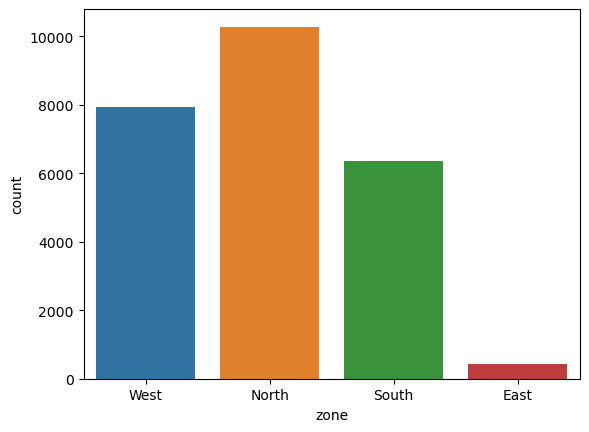

In [122]:
sns.countplot(x='zone',data=df)

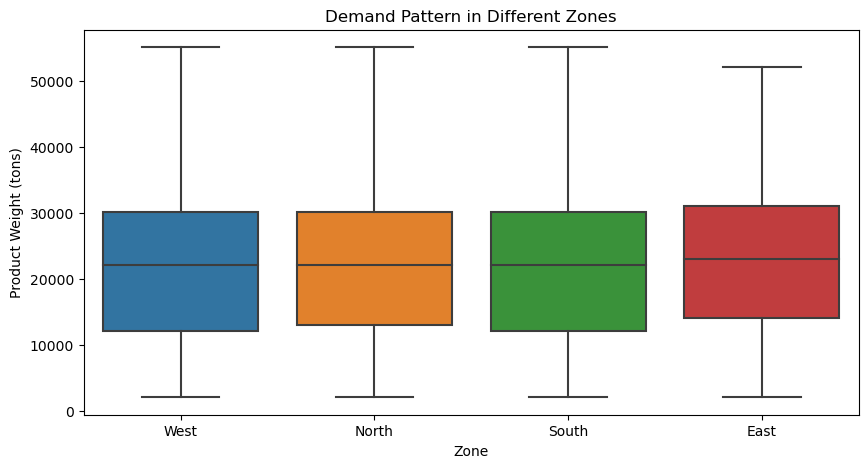

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# # If necessary, convert the "zone" column to a categorical type for proper ordering
# df['zone'] = df['zone'].astype('category')

# # Set the order of zones for proper ordering on the box plot
# zone_order = sorted(df['zone'].unique())

# Create a box plot using seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(x='zone', y='product_wg_ton', data=df)
plt.title('Demand Pattern in Different Zones')
plt.xlabel('Zone')
plt.ylabel('Product Weight (tons)')
plt.show()


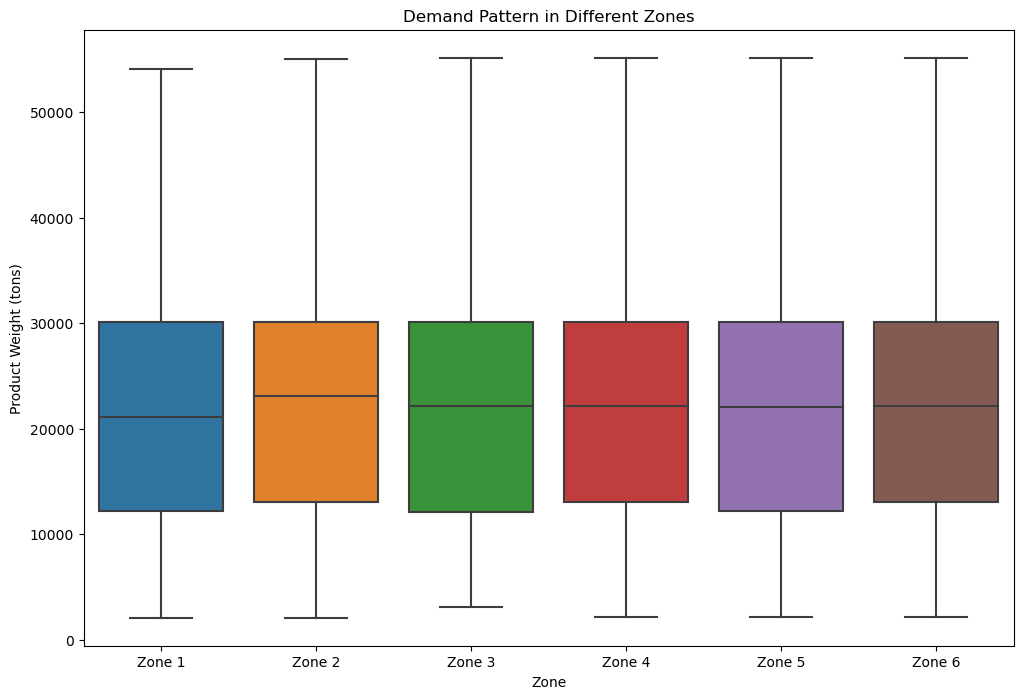

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# If necessary, convert the "zone" column to a categorical type for proper ordering
df['WH_regional_zone'] = df['WH_regional_zone'].astype('category')

# Set the order of zones for proper ordering on the box plot
zone_order = sorted(df['WH_regional_zone'].unique())

# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='WH_regional_zone', y='product_wg_ton', data=df, order=zone_order)
plt.title('Demand Pattern in Different Zones')
plt.xlabel('Zone')
plt.ylabel('Product Weight (tons)')
plt.show()


In [112]:
import pandas as pd

# Assuming df is your DataFrame
# Group data by the "zone" or "WH_regional_zone" column
grouped_data = df.groupby('zone')  # or df.groupby('WH_regional_zone')

# Calculate mean, median, and standard deviation for each zone
zone_stats = grouped_data['product_wg_ton'].agg(['mean', 'median', 'std']).reset_index()

# Display the statistics for each zone
print(zone_stats)


    zone          mean   median           std
0   East  22721.452214  23081.0  11320.233515
1  North  22199.437926  22111.0  11548.679652
2  South  21933.495913  22071.0  11715.575498
3   West  22079.384189  22105.0  11612.324121


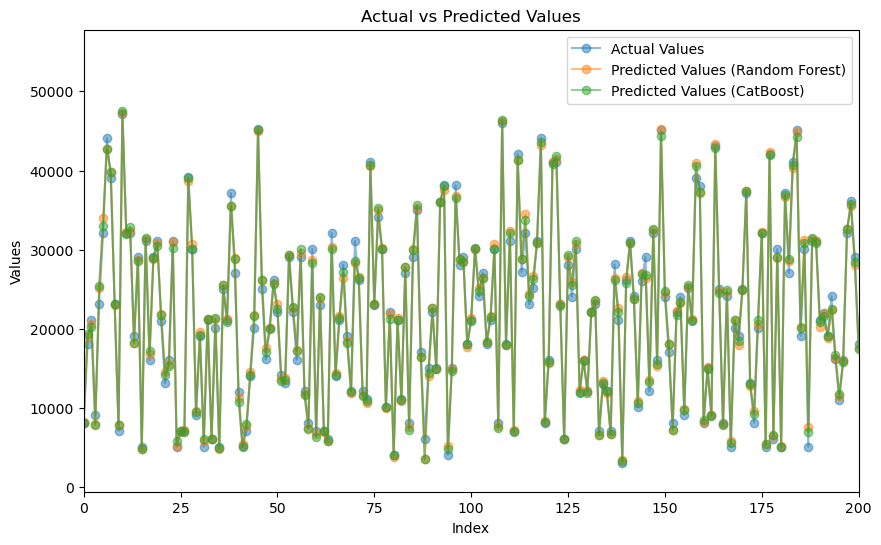

In [116]:
import matplotlib.pyplot as plt

# Assuming 'final_comparison_df' is your DataFrame
# and 'Predicted_Values_rf' and 'Predicted_Values_ct' are columns with predictions
actual_values = final_comparison_df['Actual_Values']
predicted_values_rf = final_comparison_df['Predicted_Values_rf']
predicted_values_ct = final_comparison_df['Predicted_Values_ct']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o',alpha=0.5)
plt.plot(predicted_values_rf, label='Predicted Values (Random Forest)', marker='o',alpha=0.5)
plt.plot(predicted_values_ct, label='Predicted Values (CatBoost)', marker='o',alpha=0.5)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.xlim(0,200)
#plt.ylim(0, max(final_comparison_df['Actual_Values'].max(), final_comparison_df['Predicted_Values_rf'].max(), final_comparison_df['Predicted_Values_ct'].max()) + 10000)
# Show the plot
plt.show()


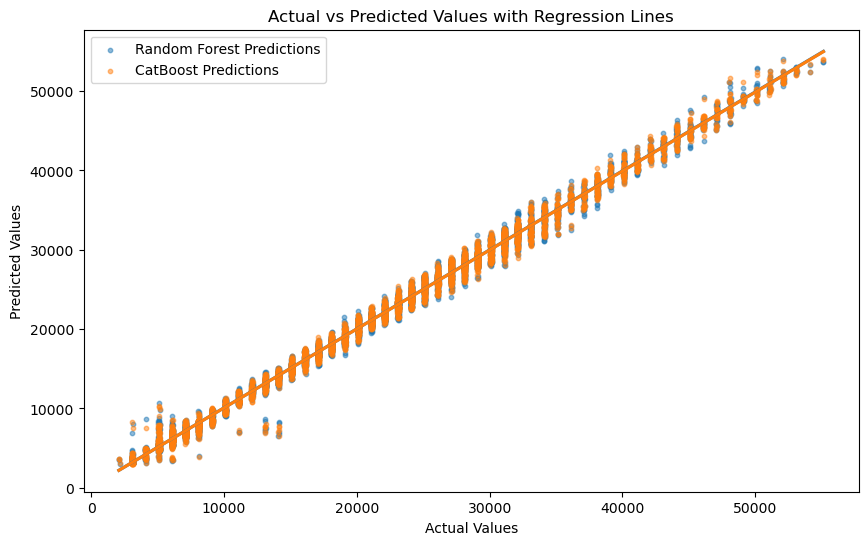

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_comparison_df' is your DataFrame
# and 'Predicted_Values_rf' and 'Predicted_Values_ct' are columns with predictions
actual_values = final_comparison_df['Actual_Values']
predicted_values_rf = final_comparison_df['Predicted_Values_rf']
predicted_values_ct = final_comparison_df['Predicted_Values_ct']

# Create a scatter plot with alpha transparency
plt.figure(figsize=(10, 6))
sns.regplot(x=actual_values, y=predicted_values_rf, label='Random Forest Predictions', scatter_kws={'s': 10, 'alpha': 0.5})
sns.regplot(x=actual_values, y=predicted_values_ct, label='CatBoost Predictions', scatter_kws={'s': 10, 'alpha': 0.5})

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Lines')
plt.legend()

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

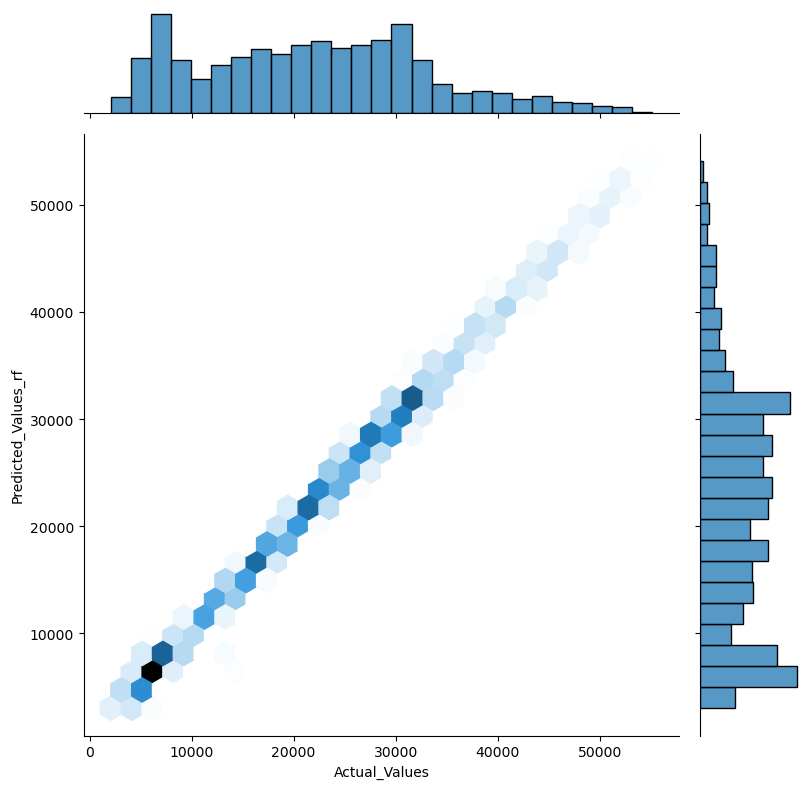

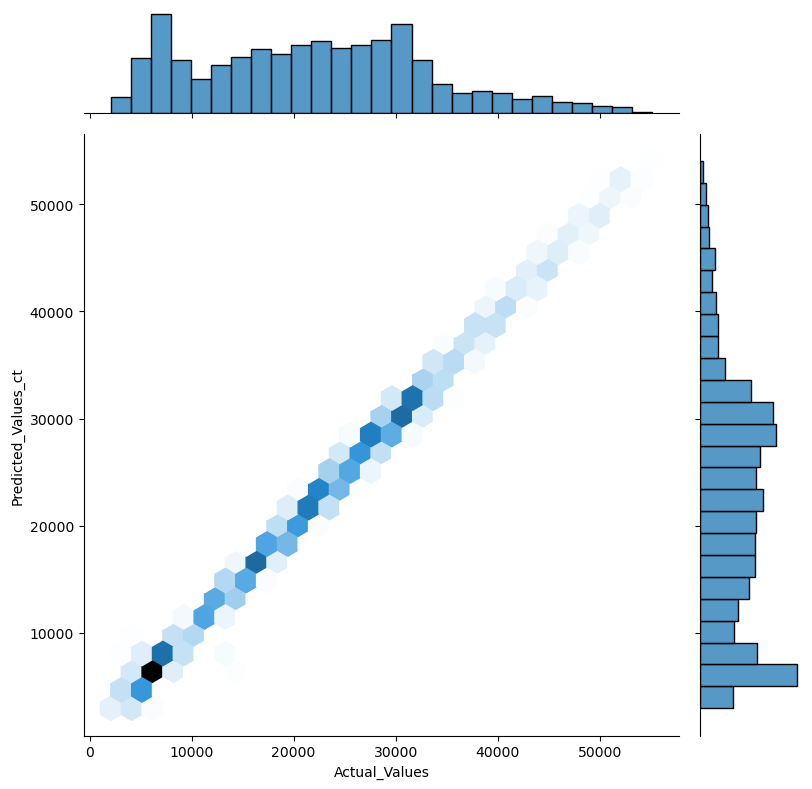

In [118]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=actual_values, y=predicted_values_rf, kind='hex', label='Random Forest Predictions', height=8)
sns.jointplot(x=actual_values, y=predicted_values_ct, kind='hex', label='CatBoost Predictions', height=8)

# Show the plots
plt.show()


---------------------Project ends here----------------------------